<a href="https://colab.research.google.com/github/Maharaniputrie/Portofolio_Maharani-Putri-Efendi/blob/main/5026211095_Maharani_Putri_Efend_Quiz_2_DLH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Pre-processing (Association Rule dan Clustering)

## Import Library

In [ ]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import sklearn
!pip install mlxtend
!pip install yellowbrick
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedKFold, RepeatedStratifiedKFold, ShuffleSplit, StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Load libraries
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.compose import ColumnTransformer
from mlxtend.feature_selection import SequentialFeatureSelector


/usr/local/lib/python3.10/dist-packages/yellowbrick/style/colors.py:35: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  mpl_ge_150 = LooseVersion(mpl.__version__) >= "1.5.0"
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/usr/local/lib/python3.10/dist-packages/yellowbrick/style/rcmod.py:31: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  mpl_ge_150 = LooseVersion(mpl.__version__) >= "1.5.0"
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


## Buat Dataframe dan membaca file parquet

In [ ]:
#Membaca file parquet dan menyimpan pada dataframe Online_Retail
Online_Retail= pd.read_parquet('https://github.com/Maharaniputrie/Kuis-DLH/raw/3acd0205f580acf2f655b121fb10e9156530c1c6/Online_Retail.parquet')
pd.set_option('display.max_columns', None)
Online_Retail.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

## Pengecekan Dataset

In [ ]:
#Mengeceka apakah terdapat nilai null pada dataframe Online_Retail
Online_Retail.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
#menghapus baris yang mengandung nilai null (NaN)
Online_Retail.dropna()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
...                    ...        ...         ...             ...  
541904 2011-12-09 12:50:00       0.85     12680.0          France  
541905 2011-12-09 12:50:00       2.10     12680.0          France  
541906 2011-12-09 12:50:00       4.15     12680.0          France  
541907 2011-12-09 12:50:00       4.15     12680.0          France  
541908 2011-12-09 12:50:00       4.95     12680.0          France  

[406829 rows x 8 columns]

In [ ]:
#Melakukan pengecekan tipe data pada Online_Retail
Online_Retail.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
#melakukan pengecekan apakah terdapat baris duplikat dan drop duplicated data
Online_Retail.duplicated()
Online_Retail= Online_Retail.drop_duplicates()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Mengubah Format pada kolom InvoiceDate

In [ ]:
#Mengubah penamaan kolom InvoiceDate dan mengubah format menjadi Datetime
Online_Retail['Tanggal'] = pd.to_datetime(Online_Retail['InvoiceDate'], format='%m/%d/%Y')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-9-03af11ed6089>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Online_Retail['Tanggal'] = pd.to_datetime(Online_Retail['InvoiceDate'], format='%m/%d/%Y')


# Associaion Rule

## Filtering Data

In [ ]:
#Menghitung berapa banyak kategori negara pada kolom Country
Online_Retail['Country'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


United Kingdom          490300
Germany                   9480
France                    8541
EIRE                      8184
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1994
Portugal                  1510
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Unspecified                442
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     294
USA                        291
Hong Kong                  284
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [ ]:
#Melakukan filter data dengan mengambil data transaksi di Jerman, menghitung berapa banyak setiap barang yang dibeli untuk setiap nomor faktur (InvoiceNo), Mengubah barang menjadi kolom dan InoviceNo menjadi index, mengatur kembali indeks agar nomor faktur menjadi kolom biasa., danmengisi nilai yang kosong (NaN) dengan nol.
dt = (Online_Retail[Online_Retail['Country'] == "Germany"]
      .groupby(['InvoiceNo', 'Description'])['Quantity'].count()
      .unstack().reset_index().fillna(0)
      .set_index('InvoiceNo'))

dt.head(10)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Description   50'S CHRISTMAS GIFT BAG LARGE   DOLLY GIRL BEAKER  \
InvoiceNo                                                         
536527                                  0.0                 0.0   
536840                                  0.0                 0.0   
536861                                  0.0                 0.0   
536967                                  0.0                 0.0   
536983                                  0.0                 0.0   
537197                                  0.0                 0.0   
537198                                  0.0                 0.0   
537201                                  0.0                 0.0   
537212                                  0.0                 0.0   
537250                                  0.0                 0.0   

Description   I LOVE LONDON MINI BACKPACK   RED SPOT GIFT BAG LARGE  \
InvoiceNo                                                             
536527                                0.0                       0.0   
536840                                0.0                       0.0   
536861                                0.0                       0.0   
536967                                0.0                       0.0   
536983                                0.0                       0.0   
537197                                0.0                       0.0   
537198                                0.0                       0.0   
537201                                0.0                       0.0   
537212                                0.0                       0.0   
537250                                0.0                       0.0   

Description   SET 2 TEA TOWELS I LOVE LONDON    SPACEBOY BABY GIFT SET  \
InvoiceNo                                                                
536527                                    0.0                      0.0   
536840                                    0.0                      0.0   
536861                                    0.0                      0.0   
536967                                    0.0                      0.0   
536983                                    0.0                      0.0   
537197                                    0.0                      0.0   
537198                                    0.0                      0.0   
537201                                    0.0                      0.0   
537212                                    0.0                      0.0   
537250                                    0.0                      0.0   

Description  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  \
InvoiceNo                                                         
536527                          0.0                         0.0   
536840                          0.0                         0.0   
536861                          0.0                         0.0   
536967                          0.0                         0.0   
536983                          0.0                         0.0   
537197                          0.0                         0.0   
537198                          0.0                         0.0   
537201                          0.0                         0.0   
537212                          0.0                         0.0   
537250                          0.0                         0.0   

Description  12 IVORY ROSE PEG PLACE SETTINGS  \
InvoiceNo                                       
536527                                    0.0   
536840                                    0.0   
536861                                    0.0   
536967                                    0.0   
536983                                    0.0   
537197                                    0.0   
537198                                    0.0   
537201                                    0.0   
537212                                    0.0   
537250                                    0.0   

Description  12 MESSAGE CARDS WITH ENVELOPES  12 PENCIL SMA

Pada, intinya kode diatas digunakan untuk menganalisis data Online_Retail khususnya untuk transaksi yang terjadi di Jerman. Selain itu, memperlihatkan berapa banyak setiap barang yang dibeli untuk setiap transaksi di Jerman

## Encode Data

In [ ]:
#Melakukan encode data dan penerapan fungsi tersebut ke dalam dataframe dt
def encode_units(x):
  if x <= 0:
    return 0
  if x >= 1:
    return 1

Online_sets = dt.applymap(encode_units)
Online_sets.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Description   50'S CHRISTMAS GIFT BAG LARGE   DOLLY GIRL BEAKER  \
InvoiceNo                                                         
536527                                    0                   0   
536840                                    0                   0   
536861                                    0                   0   
536967                                    0                   0   
536983                                    0                   0   
537197                                    0                   0   
537198                                    0                   0   
537201                                    0                   0   
537212                                    0                   0   
537250                                    0                   0   

Description   I LOVE LONDON MINI BACKPACK   RED SPOT GIFT BAG LARGE  \
InvoiceNo                                                             
536527                                  0                         0   
536840                                  0                         0   
536861                                  0                         0   
536967                                  0                         0   
536983                                  0                         0   
537197                                  0                         0   
537198                                  0                         0   
537201                                  0                         0   
537212                                  0                         0   
537250                                  0                         0   

Description   SET 2 TEA TOWELS I LOVE LONDON    SPACEBOY BABY GIFT SET  \
InvoiceNo                                                                
536527                                      0                        0   
536840                                      0                        0   
536861                                      0                        0   
536967                                      0                        0   
536983                                      0                        0   
537197                                      0                        0   
537198                                      0                        0   
537201                                      0                        0   
537212                                      0                        0   
537250                                      0                        0   

Description  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  \
InvoiceNo                                                         
536527                            0                           0   
536840                            0                           0   
536861                            0                           0   
536967                            0                           0   
536983                            0                           0   
537197                            0                           0   
537198                            0                           0   
537201                            0                           0   
537212                            0                           0   
537250                            0                           0   

Description  12 IVORY ROSE PEG PLACE SETTINGS  \
InvoiceNo                                       
536527                                      0   
536840                                      0   
536861                                      0   
536967                                      0   
536983                                      0   
537197                                      0   
537198                                      0   
537201                                      0   
537212                                      0   
537250                                      0   

Description  12 MESSAGE CARDS WITH ENVELOPES  12 PENCIL SMA

Jadi, kode diatas digunakan untuk mengkonversi jumlah pembelian suatu barang menjadi o atau 1. Jika suatu barang pernah dibeli setidaknya satu kali, maka nilainya 1. Jika tidak pernah dibeli, maka nilainya 0. Kemudian fungsi tersebut diterapkan pada dataset dt dan menghasilkan dataframe baru yaitu Online_sets

## Mencari Frequent Itemsets

In [ ]:
#Penggunaan Algoritma Apriori
frequent_itemsets = apriori(Online_sets, min_support=0.05, use_colnames=True)
frequent_itemsets.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support                       itemsets
0  0.082919       (6 RIBBONS RUSTIC CHARM)
1  0.054726    (ALARM CLOCK BAKELIKE PINK)
2  0.051410  (CHARLOTTE BAG APPLES DESIGN)
3  0.074627            (GUMBALL COAT RACK)
4  0.056385        (JAM JAR WITH PINK LID)
5  0.071310       (JAM MAKING SET PRINTED)
6  0.051410             (JUMBO BAG APPLES)
7  0.059701      (JUMBO BAG RED RETROSPOT)
8  0.079602   (JUMBO BAG WOODLAND ANIMALS)
9  0.059701           (LUNCH BAG WOODLAND)

## Penerapan Association Rule

In [ ]:
#Membuat association rule dari itemsets yang ditemukan algoritma apriori
association = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
association.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


antecedents                         consequents  \
0                           (POSTAGE)            (6 RIBBONS RUSTIC CHARM)   
1            (6 RIBBONS RUSTIC CHARM)                           (POSTAGE)   
2            (JAM MAKING SET PRINTED)                           (POSTAGE)   
3                           (POSTAGE)            (JAM MAKING SET PRINTED)   
4        (JUMBO BAG WOODLAND ANIMALS)                           (POSTAGE)   
5                           (POSTAGE)        (JUMBO BAG WOODLAND ANIMALS)   
6                (LUNCH BAG WOODLAND)                           (POSTAGE)   
7                           (POSTAGE)                (LUNCH BAG WOODLAND)   
8  (PLASTERS IN TIN WOODLAND ANIMALS)    (PLASTERS IN TIN CIRCUS PARADE )   
9    (PLASTERS IN TIN CIRCUS PARADE )  (PLASTERS IN TIN WOODLAND ANIMALS)   

   antecedent support  consequent support   support  confidence      lift  \
0            0.635158            0.082919  0.069652    0.109661  1.322507   
1            0.082919            0.635158  0.069652    0.840000  1.322507   
2            0.071310            0.635158  0.056385    0.790698  1.244884   
3            0.635158            0.071310  0.056385    0.088773  1.244884   
4            0.079602            0.635158  0.066335    0.833333  1.312010   
5            0.635158            0.079602  0.066335    0.104439  1.312010   
6            0.059701            0.635158  0.051410    0.861111  1.355744   
7            0.635158            0.059701  0.051410    0.080940  1.355744   
8            0.109453            0.094527  0.051410    0.469697  4.968900   
9            0.094527            0.109453  0.051410    0.543860  4.968900   

   leverage  conviction  zhangs_metric  
0  0.016985    1.030036       0.668398  
1  0.016985    2.280265       0.265909  
2  0.011092    1.743136       0.211817  
3  0.011092    1.019164       0.539171  
4  0.015775    2.189055       0.258378  
5  0.015775    1.027733       0.651818  
6  0.013490    2.626866       0.279058  
7  0.013490    1.023109       0.719208  
8  0.041063    1.707463       0.896918  
9  0.041063    1.952354       0.882134

In [ ]:
#Menampilkan association rule berdasarkan nilai lift setidaknya 1 dan confidence setidaknya 0.8
result = association[(association['lift'] >= 1) & (association['confidence'] >= 0.8)]

associationrule = result.sort_values(by='confidence', ascending=False)

pd.set_option('display.max_colwidth', None)
pd.reset_option('display.max_colwidth')
associationrule.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


antecedents consequents  \
38  (ROUND SNACK BOXES SET OF 4 FRUITS , ROUND SNA...   (POSTAGE)   
14                        (PLASTERS IN TIN STRONGMAN)   (POSTAGE)   
12                         (PLASTERS IN TIN SPACEBOY)   (POSTAGE)   
32                           (WOODLAND CHARLOTTE BAG)   (POSTAGE)   
24               (ROUND SNACK BOXES SET OF 4 FRUITS )   (POSTAGE)   
28                              (SPACEBOY LUNCH BOX )   (POSTAGE)   
26              (ROUND SNACK BOXES SET OF4 WOODLAND )   (POSTAGE)   
6                                (LUNCH BAG WOODLAND)   (POSTAGE)   
1                            (6 RIBBONS RUSTIC CHARM)   (POSTAGE)   
4                        (JUMBO BAG WOODLAND ANIMALS)   (POSTAGE)   

    antecedent support  consequent support   support  confidence      lift  \
38            0.102819            0.635158  0.094527    0.919355  1.447444   
14            0.056385            0.635158  0.051410    0.911765  1.435494   
12            0.084577            0.635158  0.076285    0.901961  1.420058   
32            0.097844            0.635158  0.087894    0.898305  1.414303   
24            0.129353            0.635158  0.114428    0.884615  1.392750   
28            0.079602            0.635158  0.069652    0.875000  1.377611   
26            0.197347            0.635158  0.170813    0.865546  1.362727   
6             0.059701            0.635158  0.051410    0.861111  1.355744   
1             0.082919            0.635158  0.069652    0.840000  1.322507   
4             0.079602            0.635158  0.066335    0.833333  1.312010   

    leverage  conviction  zhangs_metric  
38  0.029221    4.524046       0.344554  
14  0.015596    4.134881       0.321503  
12  0.022565    3.721393       0.323133  
32  0.025747    3.587617       0.324709  
24  0.032268    3.161968       0.323892  
28  0.019092    2.918740       0.297812  
26  0.045466    2.713516       0.331622  
6   0.013490    2.626866       0.279058  
1   0.016985    2.280265       0.265909  
4   0.015775    2.189055       0.258378

# Clustering

Karena sebelumnya sudah dilakukan pre-processing maka selanjutnya langsung saja ke step Data Preparation. Analisis pada kasus ini bertujuan untuk melakukan segmentasi pelanggan berdasarkan tiga faktor utama, yaitu Recency (R), Frequency (F), dan Monetary (M).
1. **Recency (R):** jumlah hari sejak pelanggan melakukan pembelian terakhir. Tujuan analisis adalah untuk memahami sejauh mana pelanggan tetap aktif dan terlibat dalam transaksi belanja berdasarkan lamanya waktu sejak pembelian terakhir.
2. **Frequency (F):** jumlah proses transaksi yang dilakukan oleh pelanggan. Analisis bertujuan untuk mengidentifikasi seberapa sering pelanggan melakukan transaksi, membantu dalam memahami tingkat keterlibatan dan kesetiaan pelanggan terhadap bisnis.
3. **Monetary (M):** jumlah total transaksi atau kontribusi pendapatan dari setiap pelanggan. Tujuan analisis adalah untuk mengevaluasi seberapa besar dampak finansial yang diberikan oleh setiap pelanggan, membantu dalam mengidentifikasi pelanggan yang berpotensi menjadi kontributor utama pendapatan.


## Membuat Kolom baru (Pendapatan, Frekuensi, dan Recency)

---



Frequency :

In [ ]:
#Membuat kolom frequency dengan isi kolom yaitu menghitung berapa banyak pembelian (InvoiceNo) pada setiap customer
Frekuensi = Online_Retail.groupby('CustomerID')['InvoiceNo'].count()
Frekuensi = Frekuensi.reset_index()
Frekuensi.columns = ['CustomerID', 'Frequency']
Frekuensi.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CustomerID  Frequency
0     12346.0          2
1     12347.0        182
2     12348.0         31
3     12349.0         73
4     12350.0         17
5     12352.0         95
6     12353.0          4
7     12354.0         58
8     12355.0         13
9     12356.0         59

Monetary :

In [ ]:
# Membuat kolom baru dengan nama pendapatan yang berisi quantity*unitprice
Online_Retail['Pendapatan'] = Online_Retail['Quantity']*Online_Retail['UnitPrice']

# Menghitung total pendapatan per pelanggan
total_pendapatan_per_pelanggan = Online_Retail.groupby('CustomerID')['Pendapatan'].sum()

# Mereset indeks agar hasilnya berupa DataFrame
total_pendapatan_per_pelanggan = total_pendapatan_per_pelanggan.reset_index()

# Menampilkan 10 baris pertama hasil perhitungan
total_pendapatan_per_pelanggan.head(10)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CustomerID  Pendapatan
0     12346.0        0.00
1     12347.0     4310.00
2     12348.0     1797.24
3     12349.0     1757.55
4     12350.0      334.40
5     12352.0     1545.41
6     12353.0       89.00
7     12354.0     1079.40
8     12355.0      459.40
9     12356.0     2811.43

Recency :

In [ ]:
# Menggabungkan dua DataFrame berdasarkan 'CustomerID' dengan metode 'inner'
cluster = pd.merge(total_pendapatan_per_pelanggan, Frekuensi, on='CustomerID', how='inner')
cluster.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CustomerID  Pendapatan  Frequency
0     12346.0        0.00          2
1     12347.0     4310.00        182
2     12348.0     1797.24         31
3     12349.0     1757.55         73
4     12350.0      334.40         17
5     12352.0     1545.41         95
6     12353.0       89.00          4
7     12354.0     1079.40         58
8     12355.0      459.40         13
9     12356.0     2811.43         59

In [ ]:
#Mengubah kolom InvoiceDate menjadi datetime
Online_Retail['InvoiceDate'] = pd.to_datetime(Online_Retail['InvoiceDate'],format='%d-%m-%Y %H:%M')
#Mencari tanggal terakhir transasksi pada dataset Online_Retail
MaxDate = max(Online_Retail['InvoiceDate'])
MaxDate


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Timestamp('2011-12-09 12:50:00')

In [ ]:
#Membuat kolom baru dengan nama Selisih yang berisi selisih MaxDate dengan InvoiceDate
Online_Retail['Selisih'] = MaxDate - Online_Retail['InvoiceDate']
Online_Retail.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

          InvoiceDate  UnitPrice  CustomerID         Country  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
5 2010-12-01 08:26:00       7.65     17850.0  United Kingdom   
6 2010-12-01 08:26:00       4.25     17850.0  United Kingdom   
7 2010-12-01 08:28:00       1.85     17850.0  United Kingdom   
8 2010-12-01 08:28:00       1.85     17850.0  United Kingdom   
9 2010-12-01 08:34:00       1.69     13047.0  United Kingdom   

              Tanggal  Pendapatan           Selisih  
0 2010-12-01 08:26:00       15.30 373 days 04:24:00  
1 2010-12-01 08:26:00       20.34 373 days 04:24:00  
2 2010-12-01 08:26:00       22.00 373 days 04:24:00  
3 2010-12-01 08:26:00       20.34 373 days 04:24:00  
4 2010-12-01 08:26:00       20.34 373 days 04:24:00  
5 2010-12-01 08:26:00       15.30 373 days 04:24:00  
6 2010-12-01 08:26:00       25.50 373 days 04:24:00  
7 2010-12-01 08:28:00       11.10 373 days 04:22:00  
8 2010-12-01 08:28:00       11.10 373 days 04:22:00  
9 2010-12-01 08:34:00       54.08 373 days 04:16:00

In [ ]:
#Melakukan perhitungan jumlah hari sejak pelanggan melakukan pembelian terakhir.
LastTransaction = Online_Retail.groupby('CustomerID')['Selisih'].min()
LastTransaction = LastTransaction.reset_index()
LastTransaction.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CustomerID           Selisih
0     12346.0 325 days 02:33:00
1     12347.0   1 days 20:58:00
2     12348.0  74 days 23:37:00
3     12349.0  18 days 02:59:00
4     12350.0 309 days 20:49:00
5     12352.0  35 days 22:13:00
6     12353.0 203 days 19:03:00
7     12354.0 231 days 23:39:00
8     12355.0 213 days 23:01:00
9     12356.0  22 days 04:10:00

Karena data yang dibutuhkan hanya data jumlah haru saja maka selanjutnya melakukan pengambilan hari saja untuk kolom selisih

In [ ]:
#Hanya mengambil jumlah hari saja pada kolom Selisih
LastTransaction['Selisih'] = LastTransaction['Selisih'].dt.days
LastTransaction.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CustomerID  Selisih
0     12346.0      325
1     12347.0        1
2     12348.0       74
3     12349.0       18
4     12350.0      309
5     12352.0       35
6     12353.0      203
7     12354.0      231
8     12355.0      213
9     12356.0       22

In [ ]:
#Menggabungkan dataframe sebelumnya ke dalam dataframe cluster dan mengubah nama kolom
cluster = pd.merge(cluster,LastTransaction, on='CustomerID', how='inner')
cluster.columns = ['CustomerID', 'Pendapatan', 'Frekuensi', 'Recency']
cluster.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CustomerID  Pendapatan  Frekuensi  Recency
0     12346.0        0.00          2      325
1     12347.0     4310.00        182        1
2     12348.0     1797.24         31       74
3     12349.0     1757.55         73       18
4     12350.0      334.40         17      309
5     12352.0     1545.41         95       35
6     12353.0       89.00          4      203
7     12354.0     1079.40         58      231
8     12355.0      459.40         13      213
9     12356.0     2811.43         59       22

## Pengecekan Outliers pada Data Frame Cluster


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


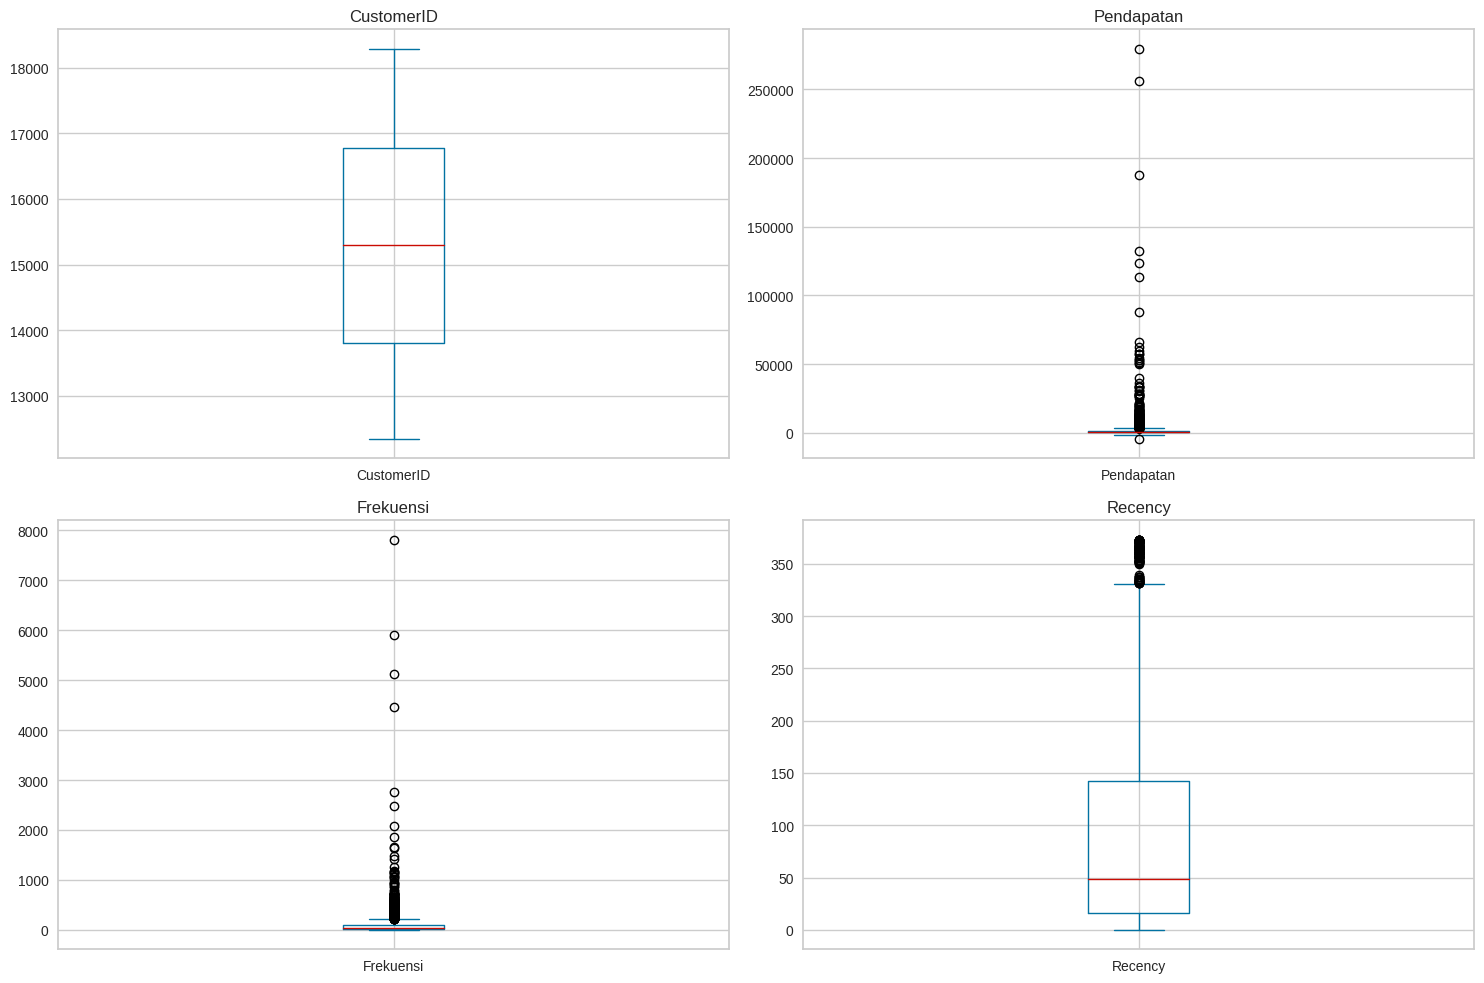

In [ ]:
# Membuat satu gambar dengan subplot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Iterasi melalui kolom-kolom yang akan diplot
for i, data in enumerate(cluster):
    # Menentukan subplot yang sesuai
    row = i // 2
    col = i % 2

    # Membuat boxplot dalam subplot
    cluster[data].plot(kind='box', ax=axes[row, col])
    axes[row, col].set_title(data)

# Mengatur tata letak subplot
plt.tight_layout()

# Menampilkan gambar
plt.show()


In [ ]:
# Removing (statistical) outliers for Pendapatan
Q1 = cluster.Pendapatan.quantile(0.05)
Q3 = cluster.Pendapatan.quantile(0.95)
IQR = Q3 - Q1
cluster = cluster[(cluster.Pendapatan >= Q1 - 1.5*IQR) & (cluster.Pendapatan <= Q3 + 1.5*IQR)]
# Removing (statistical) outliers for Recency
Q1 = cluster.Recency.quantile(0.05)
Q3 = cluster.Recency.quantile(0.95)
IQR = Q3 - Q1
cluster = cluster[(cluster.Recency >= Q1 - 1.5*IQR) & (cluster.Recency <= Q3 + 1.5*IQR)]
# Removing (statistical) outliers for Frekuensi
Q1 = cluster.Frekuensi.quantile(0.05)
Q3 = cluster.Frekuensi.quantile(0.95)
IQR = Q3 - Q1
cluster = cluster[(cluster.Frekuensi >= Q1 - 1.5*IQR) & (cluster.Frekuensi <= Q3 + 1.5*IQR)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


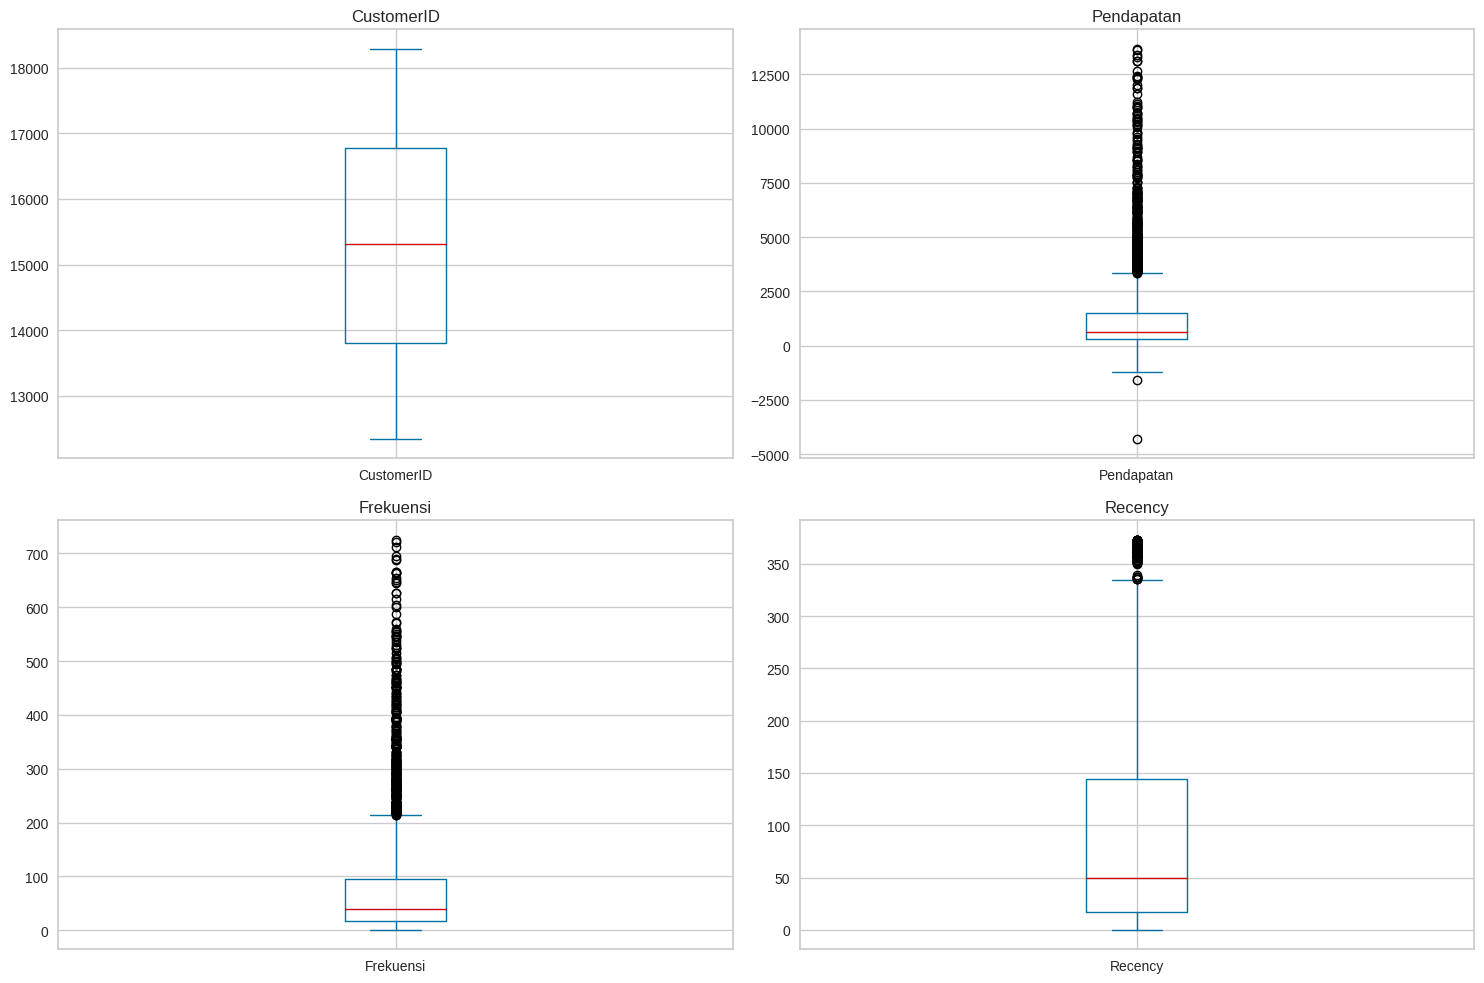

In [ ]:
# Membuat satu gambar dengan subplot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Iterasi melalui kolom-kolom yang akan diplot
for i, data in enumerate(cluster):
    # Menentukan subplot yang sesuai
    row = i // 2
    col = i % 2

    # Membuat boxplot dalam subplot
    cluster[data].plot(kind='box', ax=axes[row, col])
    axes[row, col].set_title(data)

# Mengatur tata letak subplot
plt.tight_layout()

# Menampilkan gambar
plt.show()


## Proses Normalisasi

In [ ]:
# Memilih hanya kolom 'Earnings', 'Frequency', dan 'Recency'
cluster = cluster[['Pendapatan', 'Frekuensi', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
cluster_normalisasi = scaler.fit_transform(cluster)

# Membuat DataFrame dari hasil normalisasi
cluster_normalisasi = pd.DataFrame(cluster_normalisasi, columns=['Pendapatan', 'Frequency', 'Recency'])
cluster_normalisasi.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(4295, 3)

In [ ]:
cluster_normalisasi.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Pendapatan  Frequency   Recency
0   -0.722542  -0.750830  2.302166
1    1.735232   1.057112 -0.906150
2    0.302333  -0.459551 -0.183289
3    0.279700  -0.037698 -0.737813
4   -0.531850  -0.600168  2.143731
5    0.158727   0.183273 -0.569475
6   -0.671790  -0.730742  1.094096
7   -0.107015  -0.188359  1.371358
8   -0.460569  -0.640345  1.193118
9    0.880674  -0.178315 -0.698204

## Metode K-Means

In [ ]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(cluster_normalisasi)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=4)

### Mencari nilai optimal K (Elbow Curve)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init

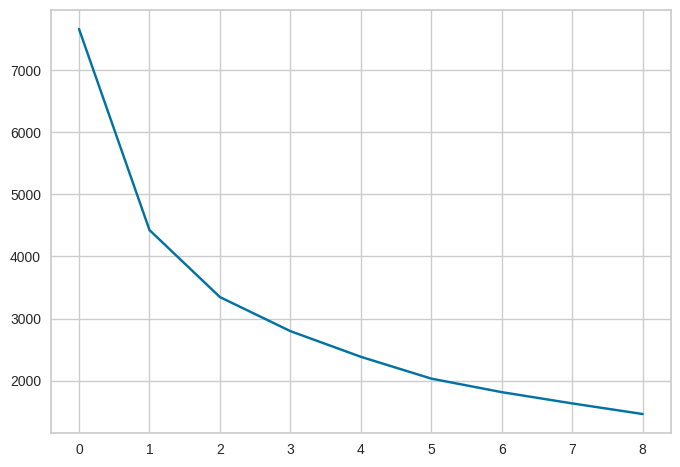

In [ ]:
#Mencari jumlah optimal dari cluster (k) dengan menggunakan metode Elbow Curve
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(cluster_normalisasi)

    ssd.append(kmeans.inertia_)
plt.plot(ssd)

Metode Elbow Curve sering digunakan untuk menentukan jumlah klaster yang optimal, di mana titik "elbow" pada kurva menunjukkan jumlah klaster yang optimal. Namun, nilai k ‘optimal’ yang diperoleh dari metode elbow curve, sering kali bersifat “ambigu”. Untuk mengatasi ambiguitas ini, dilakukan analisis Silhouette. Silhouette Analysis mengukur seberapa dekat (baik) setiap titik pada sebuah cluster dengan titik-titik data lain di clusternya. Semakin tinggi nilai rata-rata dari silhouette, maka semakin bagus clusternya menunjukkan suatu peng-cluster-an yang baik.

Dengan menggunakan kedua metode ini secara bersamaan, kita dapat mendapatkan pandangan yang lebih komprehensif untuk menentukan jumlah klaster yang paling sesuai dengan struktur data yang ada.

### Mencari Nilai K Optimal (Silhouette Analysi)

In [ ]:
# Silhouette Analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for num_clusters in range_n_clusters:

    # Initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(cluster_normalisasi)
    cluster_labels = kmeans.labels_

    # Silhouette Score
    silhouette_avg = silhouette_score(cluster_normalisasi, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=2, the silhouette score is 0.543842560086245


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=3, the silhouette score is 0.5096914125042423


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=4, the silhouette score is 0.4823453313368587


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=5, the silhouette score is 0.47093472997872504


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=6, the silhouette score is 0.4191979475125465


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=7, the silhouette score is 0.41753695822042625


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=8, the silhouette score is 0.41074238557896514


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=9, the silhouette score is 0.41362841144751694


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=10, the silhouette score is 0.38135087727969663


Dari metode Silhouette Analysis didapatkan nilai k yang optimal adalah 2 yang memiliki score 0.54

In [ ]:
# Final model with k=2
kmeans = KMeans(n_clusters=2, max_iter=50)
kmeans.fit(cluster_normalisasi)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=2)

In [ ]:
# membuat kolom cluster id
cluster['cluster_Id'] = kmeans.labels_
cluster.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Pendapatan  Frekuensi  Recency  cluster_Id
0        0.00          2      325           0
1     4310.00        182        1           1
2     1797.24         31       74           0
3     1757.55         73       18           0
4      334.40         17      309           0
5     1545.41         95       35           0
6       89.00          4      203           0
7     1079.40         58      231           0
8      459.40         13      213           0
9     2811.43         59       22           0

### Visualisasi

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


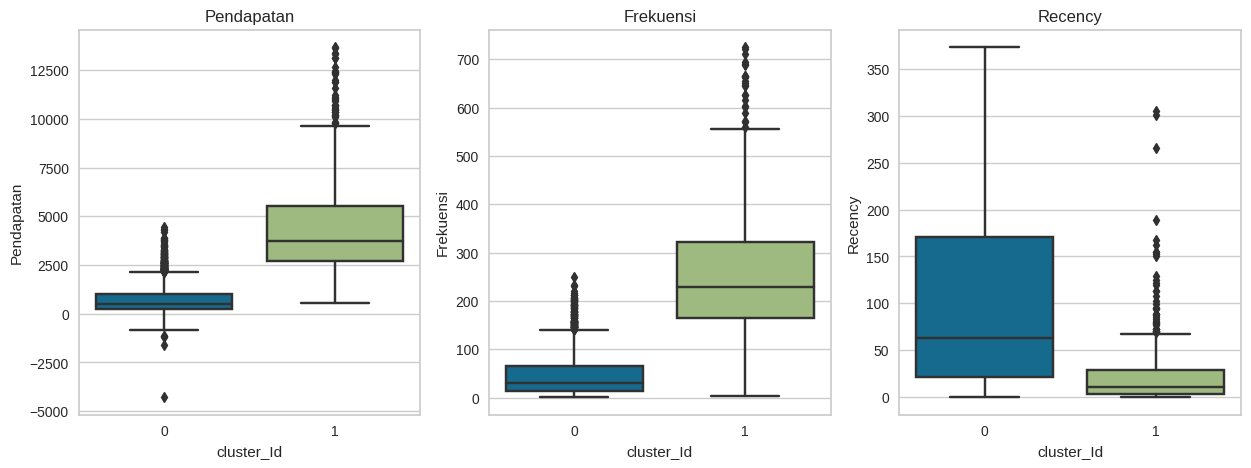

In [ ]:
# Boxplot untuk memvisualisasikan cluster id dengan Pendapatan, Frekuensi, dan Recency
# Membuat subplot
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Boxplot untuk Pendapatan
sns.boxplot(x='cluster_Id', y='Pendapatan', data=cluster, ax=axes[0])
axes[0].set_title('Pendapatan')

# Boxplot untuk Frekuensi
sns.boxplot(x='cluster_Id', y='Frekuensi', data=cluster, ax=axes[1])
axes[1].set_title('Frekuensi')

# Boxplot untuk Recency
sns.boxplot(x='cluster_Id', y='Recency', data=cluster, ax=axes[2])
axes[2].set_title('Recency')

# Menampilkan gambar
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


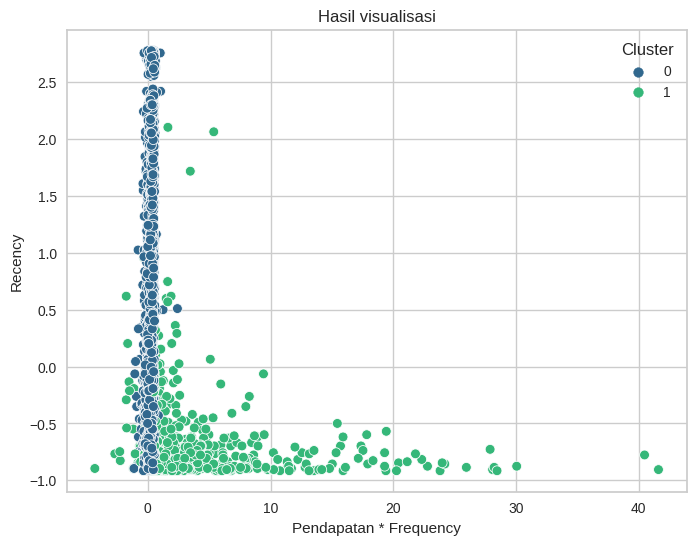

In [ ]:
# Tambahkan label klaster ke DataFrame
cluster_normalisasi['Cluster'] = kmeans.labels_

# Plot hasil klasterisasi menggunakan scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=cluster_normalisasi.Pendapatan * cluster_normalisasi.Frequency, y=cluster_normalisasi.Recency,
                hue=kmeans.labels_, palette='viridis', s=50)
plt.title('Hasil visualisasi')
plt.xlabel('Pendapatan * Frequency')
plt.ylabel('Recency')
plt.legend(title='Cluster', loc='upper right')
plt.show()


# Classification

## Data Preprocessing

### Buat Dataframe dan membaca file parquet

In [ ]:
#Membaca file parquet dan menyimpan pada dataframe Heart_Attack_Prediction_dataset
HeartAttack_Risk= pd.read_csv('https://raw.githubusercontent.com/Maharaniputrie/Kuis-DLH/main/heart_attack_prediction_dataset.csv')
pd.set_option('display.max_columns', None)
HeartAttack_Risk.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812   67    Male          208         158/88          72         0   
1    CZE1114   21    Male          389         165/93          98         1   
2    BNI9906   21  Female          324         174/99          72         1   
3    JLN3497   84    Male          383        163/100          73         1   
4    GFO8847   66    Male          318          91/88          93         1   

   Family History  Smoking  Obesity  Alcohol Consumption  \
0               0        1        0                    0   
1               1        1        1                    1   
2               0        0        0                    0   
3               1        1        0                    1   
4               1        1        1                    0   

   Exercise Hours Per Week       Diet  Previous Heart Problems  \
0                 4.168189    Average                        0   
1                 1.813242  Unhealthy                        1   
2                 2.078353    Healthy                        1   
3                 9.828130    Average                        1   
4                 5.804299  Unhealthy                        1   

   Medication Use  Stress Level  Sedentary Hours Per Day  Income        BMI  \
0               0             9                 6.615001  261404  31.251233   
1               0             1                 4.963459  285768  27.194973   
2               1             9                 9.463426  235282  28.176571   
3               0             9                 7.648981  125640  36.464704   
4               0             6                 1.514821  160555  21.809144   

   Triglycerides  Physical Activity Days Per Week  Sleep Hours Per Day  \
0            286                                0                    6   
1            235                                1                    7   
2            587                                4                    4   
3            378                                3                    4   
4            231                                1                    5   

     Country      Continent           Hemisphere  Heart Attack Risk  
0  Argentina  South America  Southern Hemisphere                  0  
1     Canada  North America  Northern Hemisphere                  0  
2     France         Europe  Northern Hemisphere                  0  
3     Canada  North America  Northern Hemisphere                  0  
4   Thailand           Asia  Northern Hemisphere                  0

In [ ]:
HeartAttack_Risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Pengecekan Dataset

In [ ]:
# Cek apakah terdapat baris yang kosong
HeartAttack_Risk.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

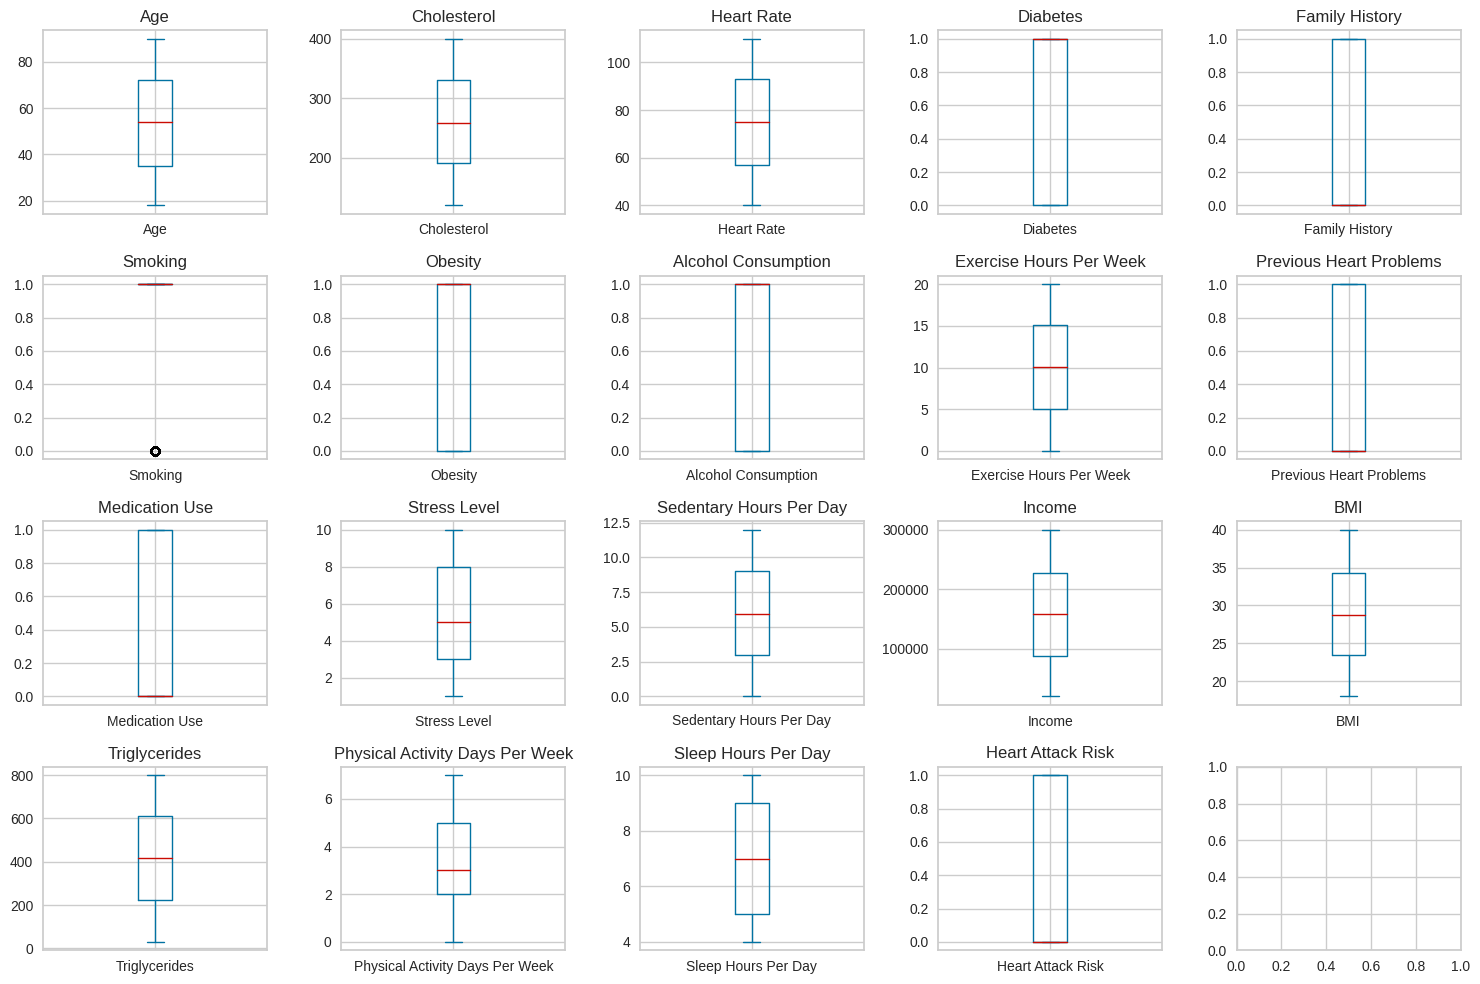

In [ ]:
ratio_data = ['Age', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History', 'Smoking','Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Previous Heart Problems', 'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Heart Attack Risk']

# Membuat satu gambar dengan subplot
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15, 10))

# Iterasi melalui kolom-kolom yang akan diplot
for i, data in enumerate(ratio_data):
    # Menentukan subplot yang sesuai
    row = i // 5
    col = i % 5

    # Membuat boxplot dalam subplot
    HeartAttack_Risk[data].plot(kind='box', ax=axes[row, col])
    axes[row, col].set_title(data)

# Mengatur tata letak subplot
plt.tight_layout()

# Menampilkan gambar
plt.show()


### Melakukan Encoded

In [ ]:
HeartAttack_2 = HeartAttack_Risk.copy()

# Ubah tipe data pada salinan DataFrame
for column in HeartAttack_2.columns:
    if column != 'Patient ID':
        HeartAttack_2[column] = HeartAttack_2[column].astype('category')
        HeartAttack_2[column] = HeartAttack_2[column].cat.codes

# Tampilkan DataFrame baru
HeartAttack_2.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Patient ID  Age  Sex  Cholesterol  Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812   49    1           88            2510          32         0   
1    CZE1114    3    1          269            2815          58         1   
2    BNI9906    3    0          204            3224          32         1   
3    JLN3497   66    1          263            2689          33         1   
4    GFO8847   48    1          198            3563          53         1   

   Family History  Smoking  Obesity  Alcohol Consumption  \
0               0        1        0                    0   
1               1        1        1                    1   
2               0        0        0                    0   
3               1        1        0                    1   
4               1        1        1                    0   

   Exercise Hours Per Week  Diet  Previous Heart Problems  Medication Use  \
0                     1841     0                        0               0   
1                      801     2                        1               0   
2                      919     1                        1               1   
3                     4284     0                        1               0   
4                     2532     2                        1               0   

   Stress Level  Sedentary Hours Per Day  Income   BMI  Triglycerides  \
0             8                     4871    7481  5375            256   
1             0                     3637    8187  3723            205   
2             8                     6884    6700  4140            557   
3             8                     5644    3282  7416            348   
4             5                     1112    4385  1534            201   

   Physical Activity Days Per Week  Sleep Hours Per Day  Country  Continent  \
0                                0                    2        0          5   
1                                1                    3        3          4   
2                                4                    0        6          3   
3                                3                    0        3          4   
4                                1                    1       16          1   

   Hemisphere  Heart Attack Risk  
0           1                  0  
1           0                  0  
2           0                  0  
3           0                  0  
4           0                  0

In [ ]:
HeartAttack_2.describe(include = 'all')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Patient ID          Age          Sex  Cholesterol  Blood Pressure  \
count        8763  8763.000000  8763.000000  8763.000000     8763.000000   
unique       8763          NaN          NaN          NaN             NaN   
top       BMW7812          NaN          NaN          NaN             NaN   
freq            1          NaN          NaN          NaN             NaN   
mean          NaN    35.707977     0.697364   139.877211     1945.335502   
std           NaN    21.249509     0.459425    80.863276     1130.449450   
min           NaN     0.000000     0.000000     0.000000        0.000000   
25%           NaN    17.000000     0.000000    72.000000      967.500000   
50%           NaN    36.000000     1.000000   139.000000     1940.000000   
75%           NaN    54.000000     1.000000   210.000000     2917.500000   
max           NaN    72.000000     1.000000   280.000000     3914.000000   

         Heart Rate     Diabetes  Family History      Smoking      Obesity  \
count   8763.000000  8763.000000     8763.000000  8763.000000  8763.000000   
unique          NaN          NaN             NaN          NaN          NaN   
top             NaN          NaN             NaN          NaN          NaN   
freq            NaN          NaN             NaN          NaN          NaN   
mean      35.021682     0.652288        0.492982     0.896839     0.501426   
std       20.550948     0.476271        0.499979     0.304186     0.500026   
min        0.000000     0.000000        0.000000     0.000000     0.000000   
25%       17.000000     0.000000        0.000000     1.000000     0.000000   
50%       35.000000     1.000000        0.000000     1.000000     1.000000   
75%       53.000000     1.000000        1.000000     1.000000     1.000000   
max       70.000000     1.000000        1.000000     1.000000     1.000000   

        Alcohol Consumption  Exercise Hours Per Week         Diet  \
count           8763.000000              8763.000000  8763.000000   
unique                  NaN                      NaN          NaN   
top                     NaN                      NaN          NaN   
freq                    NaN                      NaN          NaN   
mean               0.598083              4381.000000     0.997604   
std                0.490313              2529.804538     0.813810   
min                0.000000                 0.000000     0.000000   
25%                0.000000              2190.500000     0.000000   
50%                1.000000              4381.000000     1.000000   
75%                1.000000              6571.500000     2.000000   
max                1.000000              8762.000000     2.000000   

        Previous Heart Problems  Medication Use  Stress Level  \
count               8763.000000     8763.000000   8763.000000   
unique                      NaN             NaN           NaN   
top                         NaN             NaN           NaN   
freq                        NaN             NaN           NaN   
mean                   0.495835        0.498345      4.469702   
std                    0.500011        0.500026      2.859622   
min                    0.000000        0.000000      0.000000   
25%                    0.000000        0.000000      2.000000   
50%                    0.000000        0.000000      4.000000   
75%                    1.000000        1.000000      7.000000   
max                    1.000000        1.000000      9.000000   

        Sedentary Hours Per Day       Income          BMI  Triglycerides  \
count               8763.000000  8763.000000  8763.000000    8763.000000   
unique                      NaN          NaN          NaN            NaN   
top                         NaN          NaN          NaN            NaN   
freq                        NaN          NaN          NaN            NaN   
mean                4381.000000  4303.914983  4381.000000     387.677051   
std                 2529.804538  2485.564483  2529.804538     223.748137   
min            

## Data Balancing

In [ ]:
HeartAttack_2['Heart Attack Risk'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    5624
1    3139
Name: Heart Attack Risk, dtype: int64

In [ ]:
X = HeartAttack_2.drop('Heart Attack Risk', axis=1)
y = HeartAttack_2['Heart Attack Risk']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
balancer = RandomOverSampler(random_state=42)
X_balanced, y_balanced = balancer.fit_resample(X, y)
y_balanced.value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    5624
1    5624
Name: Heart Attack Risk, dtype: int64

## Data Splitting

In [ ]:
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=123, stratify=y_balanced)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Feature Scalling

In [ ]:
X_balanced.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Age           Sex   Cholesterol  Blood Pressure    Heart Rate  \
count  11248.000000  11248.000000  11248.000000    11248.000000  11248.000000   
mean      35.794186      0.698346    140.735331     1945.286807     35.106419   
std       21.267690      0.458996     80.604351     1127.218941     20.636118   
min        0.000000      0.000000      0.000000        0.000000      0.000000   
25%       17.000000      0.000000     73.000000      976.000000     17.000000   
50%       36.000000      1.000000    140.000000     1933.000000     35.000000   
75%       54.000000      1.000000    210.000000     2917.250000     53.000000   
max       72.000000      1.000000    280.000000     3914.000000     70.000000   

           Diabetes  Family History       Smoking       Obesity  \
count  11248.000000    11248.000000  11248.000000  11248.000000   
mean       0.657272        0.492443      0.897404      0.500800   
std        0.474642        0.499965      0.303444      0.500022   
min        0.000000        0.000000      0.000000      0.000000   
25%        0.000000        0.000000      1.000000      0.000000   
50%        1.000000        0.000000      1.000000      1.000000   
75%        1.000000        1.000000      1.000000      1.000000   
max        1.000000        1.000000      1.000000      1.000000   

       Alcohol Consumption  Exercise Hours Per Week          Diet  \
count         11248.000000             11248.000000  11248.000000   
mean              0.594772              4389.564100      0.996622   
std               0.490958              2532.743909      0.812450   
min               0.000000                 0.000000      0.000000   
25%               0.000000              2186.750000      0.000000   
50%               1.000000              4409.500000      1.000000   
75%               1.000000              6576.250000      2.000000   
max               1.000000              8762.000000      2.000000   

       Previous Heart Problems  Medication Use  Stress Level  \
count             11248.000000    11248.000000  11248.000000   
mean                  0.496799        0.502312      4.479730   
std                   0.500012        0.500017      2.855417   
min                   0.000000        0.000000      0.000000   
25%                   0.000000        0.000000      2.000000   
50%                   0.000000        1.000000      4.000000   
75%                   1.000000        1.000000      7.000000   
max                   1.000000        1.000000      9.000000   

       Sedentary Hours Per Day        Income           BMI  Triglycerides  \
count             11248.000000  11248.000000  11248.000000   11248.000000   
mean               4377.801654   4312.185989   4392.963638     389.124644   
std                2537.485951   2479.090185   2520.918789     225.125598   
min                   0.000000      0.000000      0.000000       0.000000   
25%                2182.750000   2161.000000   2200.750000     196.000000   
50%                4381.500000   4328.000000   4389.500000     390.000000   
75%                6589.250000   6463.250000   6583.250000     585.000000   
max                8762.000000   8614.000000   8762.000000     770.000000   

       Physical Activity Days Per Week  Sleep Hours Per Day       Country  \
count                     11248.000000         11248.000000  11248.000000   
mean                          3.490043             3.002845      9.408517   
std                           2.289311             1.988272      5.798626   
min                           0.000000             0.000000      0.000000   
25%                           1.000000             1.000000      4.000000   
50%                           3.000000             3.000000      9.000000   
75%                           6.000000             5.000000     14.000000   
max                           7.000000             6.000000     19.000000   

          Continent    Hemisphere  
count  11248.000000  11248.000000  
mean       2.430121    

In [ ]:
scaler = StandardScaler()

X_train['Cholesterol'] = scaler.fit_transform(X_train[['Cholesterol']]) # "fit" on the TRAIN set only, then transform
X_test['Cholesterol'] = scaler.transform(X_test[['Cholesterol']]) # while on the TEST set, just "transform" it

X_train['Age'] = scaler.fit_transform(X_train[['Age']])
X_test['Age'] = scaler.transform(X_test[['Age']])


X_train['Heart Rate'] = scaler.fit_transform(X_train[['Heart Rate']])
X_test['Heart Rate'] = scaler.transform(X_test[['Heart Rate']])

X_train['Blood Pressure'] = scaler.fit_transform(X_train[['Blood Pressure']])
X_test['Blood Pressure'] = scaler.transform(X_test[['Blood Pressure']])

X_train['Exercise Hours Per Week'] = scaler.fit_transform(X_train[['Exercise Hours Per Week']])
X_test['Exercise Hours Per Week'] = scaler.transform(X_test[['Exercise Hours Per Week']])

X_train['Income'] = scaler.fit_transform(X_train[['Income']])
X_test['Income'] = scaler.transform(X_test[['Income']])

X_train['Stress Level'] = scaler.fit_transform(X_train[['Stress Level']])
X_test['Stress Level'] = scaler.transform(X_test[['Stress Level']])

X_train['Sedentary Hours Per Day'] = scaler.fit_transform(X_train[['Sedentary Hours Per Day']])
X_test['Sedentary Hours Per Day'] = scaler.transform(X_test[['Sedentary Hours Per Day']])

X_train['BMI'] = scaler.fit_transform(X_train[['BMI']])
X_test['BMI'] = scaler.transform(X_test[['BMI']])

X_train['Triglycerides'] = scaler.fit_transform(X_train[['Triglycerides']])
X_test['Triglycerides'] = scaler.transform(X_test[['Triglycerides']])

X_train['Physical Activity Days Per Week'] = scaler.fit_transform(X_train[['Physical Activity Days Per Week']])
X_test['Physical Activity Days Per Week'] = scaler.transform(X_test[['Physical Activity Days Per Week']])

X_train.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Age          Sex   Cholesterol  Blood Pressure    Heart Rate  \
count  7.873000e+03  7873.000000  7.873000e+03    7.873000e+03  7.873000e+03   
mean  -1.606460e-16     0.702147  5.956538e-17   -1.805011e-18 -5.685786e-17   
std    1.000064e+00     0.457344  1.000064e+00    1.000064e+00  1.000064e+00   
min   -1.686207e+00     0.000000 -1.747589e+00   -1.708847e+00 -1.703197e+00   
25%   -8.888512e-01     0.000000 -8.548458e-01   -8.711094e-01 -8.796329e-01   
50%    2.311505e-03     1.000000  6.992565e-04   -1.569798e-02 -7.623941e-03   
75%    8.934742e-01     1.000000  8.562444e-01    8.671078e-01  8.643851e-01   
max    1.690830e+00     1.000000  1.724189e+00    1.749914e+00  1.687949e+00   

          Diabetes  Family History      Smoking      Obesity  \
count  7873.000000     7873.000000  7873.000000  7873.000000   
mean      0.654515        0.491299     0.897879     0.498158   
std       0.475556        0.499956     0.302827     0.500028   
min       0.000000        0.000000     0.000000     0.000000   
25%       0.000000        0.000000     1.000000     0.000000   
50%       1.000000        0.000000     1.000000     0.000000   
75%       1.000000        1.000000     1.000000     1.000000   
max       1.000000        1.000000     1.000000     1.000000   

       Alcohol Consumption  Exercise Hours Per Week         Diet  \
count          7873.000000             7.873000e+03  7873.000000   
mean              0.597993            -3.700273e-17     0.990601   
std               0.490334             1.000064e+00     0.813481   
min               0.000000            -1.727595e+00     0.000000   
25%               0.000000            -8.684746e-01     0.000000   
50%               1.000000            -6.981466e-03     1.000000   
75%               1.000000             8.647958e-01     2.000000   
max               1.000000             1.738155e+00     2.000000   

       Previous Heart Problems  Medication Use  Stress Level  \
count              7873.000000     7873.000000  7.873000e+03   
mean                  0.500572        0.502350 -1.601948e-16   
std                   0.500031        0.500026  1.000064e+00   
min                   0.000000        0.000000 -1.566426e+00   
25%                   0.000000        0.000000 -8.683548e-01   
50%                   1.000000        1.000000 -1.702839e-01   
75%                   1.000000        1.000000  8.768225e-01   
max                   1.000000        1.000000  1.574893e+00   

       Sedentary Hours Per Day        Income           BMI  Triglycerides  \
count             7.873000e+03  7.873000e+03  7.873000e+03   7.873000e+03   
mean              3.971025e-17 -1.642560e-16  7.806674e-17   4.512528e-17   
std               1.000064e+00  1.000064e+00  1.000064e+00   1.000064e+00   
min              -1.730921e+00 -1.739423e+00 -1.753798e+00  -1.727743e+00   
25%              -8.554964e-01 -8.634391e-01 -8.640469e-01  -8.670114e-01   
50%              -1.731323e-03 -1.244202e-03 -9.680184e-04   1.146693e-02   
75%               8.646355e-01  8.597341e-01  8.704709e-01   8.677615e-01   
max               1.719582e+00  1.753967e+00  1.733550e+00   1.688562e+00   

       Physical Activity Days Per Week  Sleep Hours Per Day      Country  \
count                     7.873000e+03          7873.000000  7873.000000   
mean                      6.678542e-17             3.000635     9.427791   
std                       1.000064e+00             1.989779     5.797405   
min                      -1.521220e+00             0.000000     0.000000   
25%                      -1.085344e+00             1.000000     4.000000   
50%                      -2.135920e-01             3.000000     9.000000   
75%                       1.094036e+00             5.000000    14.000000   
max                       1.529912e+00             6.000000    19.000000   

         Continent   Hemisphere  
count  7873.000000  7873.000000  
mean      2.427537     0.353487  
std       1.597481     0.478082  
min       0.0

## Classification Model

In [ ]:
model_selection_scores = dict()
model_selection_scores["Metode"] = []
model_selection_scores["F1-Score Test"] = []
model_selection_scores["ROC-AUC Score Test"] = []

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
label_encoder = LabelEncoder()
for column in X_train.columns:
    if X_train[column].dtype == 'object':
        X_train[column] = label_encoder.fit_transform(X_train[column])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
label_encoder = LabelEncoder()
for column in X_test.columns:
    if X_test[column].dtype == 'object':
        X_test[column] = label_encoder.fit_transform(X_test[column])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Logistic Regression

In [ ]:

param_distributions = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Membuat objek model Regresi Logistik
logreg = LogisticRegression(random_state=123)

# Membuat objek RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=logreg,
    param_distributions=param_distributions,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_iter=10,  # Jumlah iterasi random search yang diinginkan
    random_state=123
)

# Melatih model dengan parameter terbaik
random_search.fit(X_train, y_train)

# Menampilkan parameter terbaik
best_logreg = random_search.best_params_
best_score = random_search.best_score_
print("Parameter Terbaik:", best_logreg)
print("Skor Terbaik:", best_score)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Parameter Terbaik: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.1}
Skor Terbaik: 0.510223513039269


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
# Mendefinisikan fitur-fitur berdasarkan tipe
numeric_features = ['Age', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day']
binary_features = ['Diabetes', 'Family History', 'Sex', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Previous Heart Problems', 'Medication Use', 'Hemisphere']
categorical_features = ['Blood Pressure', 'Diet', 'Country', 'Continent', 'Hemisphere', 'Stress Level']

# Membuat transformers untuk masing-masing tipe fitur
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler()), ('imputer', SimpleImputer(strategy='mean'))])
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')), ('onehot', OneHotEncoder(handle_unknown='ignore'))])
binary_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent'))])

# Menggabungkan transformers menjadi satu preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('bin', binary_transformer, binary_features)
    ],
    remainder='drop'  # Exclude other columns that are not specified
)

# Menggabungkan preprocessor dengan model
pipe = Pipeline(steps=[('preprocessor', preprocessor), ('clf', LogisticRegression(C=0.1, solver='liblinear', penalty= 'l1' ))])

# Membuat skema validasi silang
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=130)

# Melakukan validasi silang
scores = cross_val_score(pipe, X, y, cv=skf)

# Menampilkan hasil validasi silang
print("Hasil Akurasi validasi silang:")
print(scores)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Hasil Akurasi validasi silang:
[0.64196123 0.64196123 0.64196123 0.64269406 0.64155251 0.64155251
 0.64155251 0.64155251 0.64155251 0.64155251]


In [ ]:
train_set_kfold = []
test_set_kfold = []

print('\nKFold\n')
for i, (train_index, test_index) in enumerate(skf.split(X, y)): # Gunakan skf
    print(f"Fold {i}")
    print(f"  Train: index={train_index[:5]}... ({len(train_index)} rows)")
    print(f"  Test:  index={test_index[:5]}... ({len(test_index)} rows)")

    train_set_kfold.append(train_index)
    test_set_kfold.append(test_index)


KFold

Fold 0
  Train: index=[0 1 2 3 4]... (7886 rows)
  Test:  index=[32 45 47 60 61]... (877 rows)
Fold 1
  Train: index=[0 1 2 3 4]... (7886 rows)
  Test:  index=[ 5  7  8 28 33]... (877 rows)
Fold 2
  Train: index=[0 1 2 3 4]... (7886 rows)
  Test:  index=[17 26 27 82 99]... (877 rows)
Fold 3
  Train: index=[0 1 2 3 4]... (7887 rows)
  Test:  index=[22 31 36 50 62]... (876 rows)
Fold 4
  Train: index=[0 1 2 3 4]... (7887 rows)
  Test:  index=[ 9 19 35 37 38]... (876 rows)
Fold 5
  Train: index=[0 1 2 3 4]... (7887 rows)
  Test:  index=[18 29 34 43 56]... (876 rows)
Fold 6
  Train: index=[1 5 6 7 8]... (7887 rows)
  Test:  index=[ 0  2  3  4 16]... (876 rows)
Fold 7
  Train: index=[0 1 2 3 4]... (7887 rows)
  Test:  index=[ 6 13 15 20 25]... (876 rows)
Fold 8
  Train: index=[0 1 2 3 4]... (7887 rows)
  Test:  index=[10 11 12 46 52]... (876 rows)
Fold 9
  Train: index=[0 2 3 4 5]... (7887 rows)
  Test:  index=[ 1 14 42 53 55]... (876 rows)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Dataframe untuk menyimpan indeks train dan val setiap fold
kfold_set = pd.DataFrame(index=range(1, 11), columns=['train', 'val'])

# Inisialisasi list untuk menyimpan skor F1 dan ROC-AUC setiap fold
f1_scores = []
roc_auc_scores = []

# Loop melalui fold
for fold_num, (train_index, val_index) in enumerate(skf.split(X_train, y_train), start=1):
    train_features, val_features = X_train.iloc[train_index], X_train.iloc[val_index]
    train_labels, val_labels = y_train.iloc[train_index], y_train.iloc[val_index]

    # Ganti bagian ini dengan model dan preprocessor Anda
    # Sebagai contoh, saya akan menggunakan model logistik regresi tanpa penanganan kategori
    logreg = LogisticRegression(random_state=123)
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('logreg_model', logreg)])

    # Latih model
    pipe.fit(train_features, train_labels)

    # Buat prediksi
    pred_labels = pipe.predict(val_features)

    # Hitung dan simpan skor F1 dan ROC-AUC
    f1 = f1_score(val_labels, pred_labels)
    roc_auc = roc_auc_score(val_labels, pred_labels)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)

    # Simpan indeks train dan val setiap fold
    kfold_set.at[fold_num, 'train'] = train_index
    kfold_set.at[fold_num, 'val'] = val_index

    # Tampilkan skor untuk setiap fold
    print(f"F1-score for fold {fold_num}: {f1}")
    print(f"ROC-AUC score for fold {fold_num}: {roc_auc}\n")

# Temukan indeks fold dengan F1-score tertinggi
best_f1_fold = np.argmax(f1_scores) + 1  # +1 karena indeks dimulai dari 1

# Temukan indeks fold dengan ROC-AUC tertinggi
best_roc_auc_fold = np.argmax(roc_auc_scores) + 1

# Tampilkan hasil terbaik
print("Best F1-score is in fold:", best_f1_fold)
print("Best ROC-AUC is in fold:", best_roc_auc_fold)

# Ambil indeks train dan val untuk fold terbaik
best_f1_train_index = kfold_set.loc[best_f1_fold, 'train']
best_f1_val_index = kfold_set.loc[best_f1_fold, 'val']

best_roc_auc_train_index = kfold_set.loc[best_roc_auc_fold, 'train']
best_roc_auc_val_index = kfold_set.loc[best_roc_auc_fold, 'val']

# Gunakan indeks ini untuk mendapatkan data train dan val terbaik
best_f1_train_features, best_f1_val_features = X_train.iloc[best_f1_train_index], X_train.iloc[best_f1_val_index]
best_f1_train_labels, best_f1_val_labels = y_train.iloc[best_f1_train_index], y_train.iloc[best_f1_val_index]

best_roc_auc_train_features, best_roc_auc_val_features = X_train.iloc[best_roc_auc_train_index], X_train.iloc[best_roc_auc_val_index]
best_roc_auc_train_labels, best_roc_auc_val_labels = y_train.iloc[best_roc_auc_train_index], y_train.iloc[best_roc_auc_val_index]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1-score for fold 1: 0.6163682864450127
ROC-AUC score for fold 1: 0.6192893401015229



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1-score for fold 2: 0.5925925925925926
ROC-AUC score for fold 2: 0.6091370558375634



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1-score for fold 3: 0.6053921568627452
ROC-AUC score for fold 3: 0.5913705583756346



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1-score for fold 4: 0.5874673629242819
ROC-AUC score for fold 4: 0.5984422831014841



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1-score for fold 5: 0.61003861003861
ROC-AUC score for fold 5: 0.6149784942069981



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1-score for fold 6: 0.6253164556962025
ROC-AUC score for fold 6: 0.6238940339184459



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1-score for fold 7: 0.6171284634760705
ROC-AUC score for fold 7: 0.6137126877720515



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1-score for fold 8: 0.5733157199471598
ROC-AUC score for fold 8: 0.589630074527583



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1-score for fold 9: 0.6508135168961201
ROC-AUC score for fold 9: 0.645470867077408

F1-score for fold 10: 0.6147859922178989
ROC-AUC score for fold 10: 0.6226443729737409

Best F1-score is in fold: 9
Best ROC-AUC is in fold: 9


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
kfold_set.loc[best_f1_fold]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


train    [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14...
val      [9, 15, 22, 24, 59, 73, 75, 82, 102, 108, 109,...
Name: 9, dtype: object

In [ ]:
X_train.iloc[kfold_set['train'].loc[best_f1_fold]].describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Patient ID          Age          Sex  Cholesterol  Blood Pressure  \
count  7086.000000  7086.000000  7086.000000  7086.000000     7086.000000   
mean   3289.977420     0.005959     0.702089     0.002211        0.003335   
std    1897.845628     1.000011     0.457373     1.001428        0.998554   
min       0.000000    -1.686207     0.000000    -1.747589       -1.708847   
25%    1637.250000    -0.841948     0.000000    -0.854846       -0.868458   
50%    3303.000000     0.002312     1.000000     0.000699       -0.017465   
75%    4924.750000     0.893474     1.000000     0.868644        0.868875   
max    6543.000000     1.690830     1.000000     1.724189        1.749914   

        Heart Rate     Diabetes  Family History      Smoking      Obesity  \
count  7086.000000  7086.000000     7086.000000  7086.000000  7086.000000   
mean      0.001736     0.655377        0.490404     0.899097     0.499153   
std       0.998735     0.475279        0.499943     0.301222     0.500035   
min      -1.703197     0.000000        0.000000     0.000000     0.000000   
25%      -0.879633     0.000000        0.000000     1.000000     0.000000   
50%      -0.007624     1.000000        0.000000     1.000000     0.000000   
75%       0.864385     1.000000        1.000000     1.000000     1.000000   
max       1.687949     1.000000        1.000000     1.000000     1.000000   

       Alcohol Consumption  Exercise Hours Per Week         Diet  \
count          7086.000000              7086.000000  7086.000000   
mean              0.599069                -0.007494     0.986029   
std               0.490122                 1.000568     0.812883   
min               0.000000                -1.727595     0.000000   
25%               0.000000                -0.871936     0.000000   
50%               1.000000                -0.017859     1.000000   
75%               1.000000                 0.856786     2.000000   
max               1.000000                 1.738155     2.000000   

       Previous Heart Problems  Medication Use  Stress Level  \
count              7086.000000     7086.000000   7086.000000   
mean                  0.501411        0.501835      0.004234   
std                   0.500033        0.500032      1.001672   
min                   0.000000        0.000000     -1.566426   
25%                   0.000000        0.000000     -0.868355   
50%                   1.000000        1.000000      0.178752   
75%                   1.000000        1.000000      0.876822   
max                   1.000000        1.000000      1.574893   

       Sedentary Hours Per Day       Income          BMI  Triglycerides  \
count              7086.000000  7086.000000  7086.000000    7086.000000   
mean                  0.002539    -0.001340     0.004309      -0.000637   
std                   1.000237     0.998893     1.000021       1.000830   
min                  -1.730921    -1.739423    -1.753798      -1.727743   
25%                  -0.853035    -0.863845    -0.855985      -0.871448   
50%                   0.002010    -0.003880     0.004207       0.007030   
75%                   0.869853     0.856388     0.875149       0.867761   
max                   1.719582     1.753967     1.732754       1.688562   

       Physical Activity Days Per Week  Sleep Hours Per Day      Country  \
count                      7086.000000          7086.000000  7086.000000   
mean                          0.005146             3.002681     9.447220   
std                           0.999325             1.987929     5.796353   
min                          -1.521220             0.000000     0.000000   
25%                          -0.649468             1.000000     4.000000   
50%                          -0.213592             3.000000     9.000000   
75%                           1.094036             5.000000    14.000000   
max                           1.529912             6.000000    19.000000   

         Continent   Hemisphere  
count  7086.000000  7086.000000  
m

In [ ]:
X_best_f1_fold = X_train.iloc[kfold_set['train'].loc[best_f1_fold]]
y_best_f1_fold = y_train.iloc[kfold_set['train'].loc[best_f1_fold]]
logreg = LogisticRegression(C=0.01, solver='newton-cg')
logreg.fit(X_best_f1_fold, y_best_f1_fold)
y_pred_lr = logreg.predict(X_test)
print(f"F1-score: {f1_score(y_test, y_pred_lr)}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


F1-score: 0.5084444444444445


In [ ]:
model_selection_scores["Metode"].append("Logistic Regression")
model_selection_scores["F1-Score Test"].append(f1_score(y_test, y_pred_lr))
model_selection_scores["ROC-AUC Score Test"].append(roc_auc_score(y_test, y_pred_lr))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Decision Tree

In [ ]:
#Membuat model Decision Tree
dtree = DecisionTreeClassifier()

#Definisikan kumpulan parameter yang akan diuji
param_grid = {
     'max_depth': [None, 5, 10, 15, 20],
     'min_samples_split': [2, 5, 10],
     'min_samples_leaf': [1, 2, 4]
 }

#Inisialisasi Grid Search dengan model dan parameter grid
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='accuracy')

#Latih Grid Search pada data pelatihan
grid_search.fit(X_train, y_train)

#Cetak parameter terbaik yang ditemukan
print("Parameter terbaik:", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Parameter terbaik: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
# Mendefinisikan fitur-fitur berdasarkan tipe
numeric_features = ['Age', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day']
binary_features = ['Diabetes', 'Family History', 'Sex', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Previous Heart Problems', 'Medication Use', 'Hemisphere']
categorical_features = ['Blood Pressure', 'Diet', 'Country', 'Continent', 'Hemisphere', 'Stress Level']

# Membuat transformers untuk masing-masing tipe fitur
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler()), ('imputer', SimpleImputer(strategy='mean'))])
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')), ('onehot', OneHotEncoder(handle_unknown='ignore'))])
binary_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent'))])

# Menggabungkan transformers menjadi satu preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('bin', binary_transformer, binary_features)
    ],
    remainder='drop'  # Exclude other columns that are not specified
)

# Menggabungkan preprocessor dengan model
pipe = Pipeline(steps=[('preprocessor', preprocessor), ('clf', DecisionTreeClassifier(random_state=123, min_samples_leaf= 1, max_depth= None, min_samples_split =2))])
# initialize Stratified KFold splitter
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

# Melakukan validasi silang
scores = cross_val_score(pipe, X, y, cv=skf)

# Menampilkan hasil validasi silang
print("Hasil Akurasi validasi silang:")
print(scores)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Hasil Akurasi validasi silang:
[0.55188141 0.5359179  0.57354618 0.54794521 0.53424658 0.55593607
 0.53767123 0.56164384 0.53767123 0.53538813]


In [ ]:
train_set_kfold = []
test_set_kfold = []

print('\nKFold\n')
for i, (train_index, test_index) in enumerate(skf.split(X, y)): # Gunakan skf
    print(f"Fold {i}")
    print(f"  Train: index={train_index[:5]}... ({len(train_index)} rows)")
    print(f"  Test:  index={test_index[:5]}... ({len(test_index)} rows)")

    train_set_kfold.append(train_index)
    test_set_kfold.append(test_index)


KFold

Fold 0
  Train: index=[0 1 2 3 4]... (7886 rows)
  Test:  index=[15 16 33 42 44]... (877 rows)
Fold 1
  Train: index=[0 1 2 3 4]... (7886 rows)
  Test:  index=[23 50 52 85 88]... (877 rows)
Fold 2
  Train: index=[0 2 3 4 5]... (7886 rows)
  Test:  index=[ 1 11 13 27 69]... (877 rows)
Fold 3
  Train: index=[0 1 2 3 4]... (7887 rows)
  Test:  index=[ 8  9 12 18 24]... (876 rows)
Fold 4
  Train: index=[0 1 2 3 4]... (7887 rows)
  Test:  index=[ 25  47  56 103 122]... (876 rows)
Fold 5
  Train: index=[0 1 2 3 4]... (7887 rows)
  Test:  index=[20 29 51 55 62]... (876 rows)
Fold 6
  Train: index=[0 1 3 4 5]... (7887 rows)
  Test:  index=[ 2  7 19 28 34]... (876 rows)
Fold 7
  Train: index=[0 1 2 3 4]... (7887 rows)
  Test:  index=[17 22 30 32 35]... (876 rows)
Fold 8
  Train: index=[0 1 2 3 4]... (7887 rows)
  Test:  index=[ 5  6 10 14 26]... (876 rows)
Fold 9
  Train: index=[1 2 5 6 7]... (7887 rows)
  Test:  index=[ 0  3  4 21 38]... (876 rows)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Dataframe untuk menyimpan indeks train dan val setiap fold
kfold_set_dt = pd.DataFrame(index=range(1, 11), columns=['train', 'val'])

# Inisialisasi list untuk menyimpan skor F1 dan ROC-AUC setiap fold
f1_scores_dt = []
roc_auc_scores_dt = []

# Loop melalui fold
for fold_num, (train_index, val_index) in enumerate(skf.split(X_train, y_train), start=1):
    train_features, val_features = X_train.iloc[train_index], X_train.iloc[val_index]
    train_labels, val_labels = y_train.iloc[train_index], y_train.iloc[val_index]

    # Ganti bagian ini dengan model dan preprocessor Anda
    # Sebagai contoh, saya akan menggunakan model Decision Tree
    decision_tree = DecisionTreeClassifier(random_state=123, min_samples_leaf= 1, max_depth= None, min_samples_split =2)
    pipe_dt = Pipeline(steps=[('preprocessor', preprocessor), ('dt_model', decision_tree)])

    # Latih model
    pipe_dt.fit(train_features, train_labels)

    # Buat prediksi
    pred_labels_dt = pipe_dt.predict(val_features)

    # Hitung dan simpan skor F1 dan ROC-AUC
    f1_dt = f1_score(val_labels, pred_labels_dt)
    roc_auc_dt = roc_auc_score(val_labels, pred_labels_dt)
    f1_scores_dt.append(f1_dt)
    roc_auc_scores_dt.append(roc_auc_dt)

    # Simpan indeks train dan val setiap fold
    kfold_set_dt.at[fold_num, 'train'] = train_index
    kfold_set_dt.at[fold_num, 'val'] = val_index

    # Tampilkan skor untuk setiap fold
    print(f"F1-score for fold {fold_num}: {f1_dt}")
    print(f"ROC-AUC score for fold {fold_num}: {roc_auc_dt}\n")

# Temukan indeks fold dengan F1-score tertinggi
best_f1_fold_dt = np.argmax(f1_scores_dt) + 1  # +1 karena indeks dimulai dari 1

# Temukan indeks fold dengan ROC-AUC tertinggi
best_roc_auc_fold_dt = np.argmax(roc_auc_scores_dt) + 1

# Tampilkan hasil terbaik
print("Best F1-score is in fold:", best_f1_fold_dt)
print("Best ROC-AUC is in fold:", best_roc_auc_fold_dt)

# Ambil indeks train dan val untuk fold terbaik
best_f1_train_index_dt = kfold_set_dt.loc[best_f1_fold_dt, 'train']
best_f1_val_index_dt = kfold_set_dt.loc[best_f1_fold_dt, 'val']

best_roc_auc_train_index_dt = kfold_set_dt.loc[best_roc_auc_fold_dt, 'train']
best_roc_auc_val_index_dt = kfold_set_dt.loc[best_roc_auc_fold_dt, 'val']

# Gunakan indeks ini untuk mendapatkan data train dan val terbaik
best_f1_train_features_dt, best_f1_val_features_dt = X_train.iloc[best_f1_train_index_dt], X_train.iloc[best_f1_val_index_dt]
best_f1_train_labels_dt, best_f1_val_labels_dt = y_train.iloc[best_f1_train_index_dt], y_train.iloc[best_f1_val_index_dt]

best_roc_auc_train_features_dt, best_roc_auc_val_features_dt = X_train.iloc[best_roc_auc_train_index_dt], X_train.iloc[best_roc_auc_val_index_dt]
best_roc_auc_train_labels_dt, best_roc_auc_val_labels_dt = y_train.iloc[best_roc_auc_train_index_dt], y_train.iloc[best_roc_auc_val_index_dt]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


F1-score for fold 1: 0.6803874092009685
ROC-AUC score for fold 1: 0.6649746192893401

F1-score for fold 2: 0.672189349112426
ROC-AUC score for fold 2: 0.6484771573604062

F1-score for fold 3: 0.6848341232227488
ROC-AUC score for fold 3: 0.6624365482233503

F1-score for fold 4: 0.6946386946386947
ROC-AUC score for fold 4: 0.6672059260407383

F1-score for fold 5: 0.6666666666666666
ROC-AUC score for fold 5: 0.6506341948566927

F1-score for fold 6: 0.7001194743130227
ROC-AUC score for fold 6: 0.6811491714134408

F1-score for fold 7: 0.6951364175563464
ROC-AUC score for fold 7: 0.6733541287247645

F1-score for fold 8: 0.6690997566909976
ROC-AUC score for fold 8: 0.6543282830239858

F1-score for fold 9: 0.7067137809187278
ROC-AUC score for fold 9: 0.6835096420867722

F1-score for fold 10: 0.6894117647058824
ROC-AUC score for fold 10: 0.6644482763074617

Best F1-score is in fold: 9
Best ROC-AUC is in fold: 9


In [ ]:
kfold_set.loc[best_f1_fold]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


train    [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 15...
val      [6, 14, 16, 18, 19, 43, 73, 91, 100, 104, 114,...
Name: 6, dtype: object

In [ ]:
X_train.iloc[kfold_set['train'].loc[best_f1_fold]].describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Patient ID          Age          Sex  Cholesterol  Blood Pressure  \
count  7086.000000  7086.000000  7086.000000  7086.000000     7086.000000   
mean   3297.056732    -0.002123     0.701383     0.003527       -0.006625   
std    1896.786771     0.999856     0.457684     1.000642        1.002062   
min       0.000000    -1.686207     0.000000    -1.747589       -1.708847   
25%    1647.250000    -0.888851     0.000000    -0.854846       -0.875528   
50%    3300.500000     0.002312     1.000000     0.000699       -0.035581   
75%    4951.750000     0.893474     1.000000     0.868644        0.860701   
max    6543.000000     1.690830     1.000000     1.724189        1.749914   

        Heart Rate     Diabetes  Family History      Smoking      Obesity  \
count  7086.000000  7086.000000     7086.000000  7086.000000  7086.000000   
mean     -0.002346     0.655236        0.488710     0.896274     0.496472   
std       0.999476     0.475325        0.499908     0.304926     0.500023   
min      -1.703197     0.000000        0.000000     0.000000     0.000000   
25%      -0.879633     0.000000        0.000000     1.000000     0.000000   
50%      -0.007624     1.000000        0.000000     1.000000     0.000000   
75%       0.864385     1.000000        1.000000     1.000000     1.000000   
max       1.687949     1.000000        1.000000     1.000000     1.000000   

       Alcohol Consumption  Exercise Hours Per Week         Diet  \
count          7086.000000              7086.000000  7086.000000   
mean              0.597375                 0.005797     0.987158   
std               0.490461                 0.999623     0.811163   
min               0.000000                -1.727595     0.000000   
25%               0.000000                -0.855718     0.000000   
50%               1.000000                 0.003896     1.000000   
75%               1.000000                 0.870630     2.000000   
max               1.000000                 1.738155     2.000000   

       Previous Heart Problems  Medication Use  Stress Level  \
count              7086.000000     7086.000000   7086.000000   
mean                  0.499577        0.505504     -0.003450   
std                   0.500035        0.500005      0.999529   
min                   0.000000        0.000000     -1.566426   
25%                   0.000000        0.000000     -0.868355   
50%                   0.000000        1.000000     -0.170284   
75%                   1.000000        1.000000      0.876822   
max                   1.000000        1.000000      1.574893   

       Sedentary Hours Per Day       Income          BMI  Triglycerides  \
count              7086.000000  7086.000000  7086.000000    7086.000000   
mean                 -0.001216    -0.002292    -0.001946       0.003030   
std                   1.000051     0.998281     1.003110       1.001555   
min                  -1.730921    -1.739423    -1.753798      -1.727743   
25%                  -0.852641    -0.863034    -0.877682      -0.858138   
50%                   0.000041    -0.004286    -0.000371       0.007030   
75%                   0.861682     0.852637     0.875149       0.872198   
max                   1.719582     1.753562     1.733550       1.688562   

       Physical Activity Days Per Week  Sleep Hours Per Day      Country  \
count                      7086.000000          7086.000000  7086.000000   
mean                         -0.007833             3.008750     9.483065   
std                           0.999170             1.991636     5.786625   
min                          -1.521220             0.000000     0.000000   
25%                          -1.085344             1.000000     4.000000   
50%                          -0.213592             3.000000    10.000000   
75%                           0.658160             5.000000    15.000000   
max                           1.529912             6.000000    19.000000   

         Continent   Hemisphere  
count  7086.000000  7086.000000  
m

In [ ]:
X_best_f1_fold_dt = X_train.iloc[kfold_set['train'].loc[best_f1_fold]]
y_best_f1_fold_dt = y_train.iloc[kfold_set['train'].loc[best_f1_fold]]
decision_tree = DecisionTreeClassifier(random_state=123, min_samples_leaf= 1, max_depth= None, min_samples_split =2)
decision_tree.fit(X_best_f1_fold_dt, y_best_f1_fold_dt)
y_pred_dt = decision_tree.predict(X_test)
print(f"F1-score: {f1_score(y_test, y_pred_dt)}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


F1-score: 0.6480478768880024


In [ ]:
model_selection_scores["Metode"].append("Desicion Tree")
model_selection_scores["F1-Score Test"].append(f1_score(y_test, y_pred_dt))
model_selection_scores["ROC-AUC Score Test"].append(roc_auc_score(y_test, y_pred_dt))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Random Forest

In [ ]:
#Tentukan rentang parameter
param_dist = {
     'n_estimators': [100, 200, 300, 400, 500],
     'max_depth': [None, 10, 20, 30, 40],
     'min_samples_split': [2, 5, 10, 20],
     'min_samples_leaf': [1, 2, 4, 8]
 }

#Inisialisasi model
rf = RandomForestClassifier(random_state=123)

#Inisialisasi Randomized Search
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=123, n_jobs=-1)

#Lakukan pencarian parameter terbaik
random_search.fit(X_train, y_train)

#Parameter terbaik
best_params = random_search.best_params_
print("Parameter Terbaik:", best_params)

#Model dengan parameter terbaik
best_model = random_search.best_estimator_


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Parameter Terbaik: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 40}


In [ ]:
# Mendefinisikan fitur-fitur berdasarkan tipe
numeric_features = ['Age', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day']
binary_features = ['Diabetes', 'Family History', 'Sex', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Previous Heart Problems', 'Medication Use', 'Hemisphere']
categorical_features = ['Blood Pressure', 'Diet', 'Country', 'Continent', 'Hemisphere', 'Stress Level']

# Membuat transformers untuk masing-masing tipe fitur
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler()), ('imputer', SimpleImputer(strategy='mean'))])
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')), ('onehot', OneHotEncoder(handle_unknown='ignore'))])
binary_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent'))])

# Menggabungkan transformers menjadi satu preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('bin', binary_transformer, binary_features)
    ],
    remainder='drop'  # Exclude other columns that are not specified
)

# Menggabungkan preprocessor dengan model
pipe = Pipeline(steps=[('preprocessor', preprocessor), ('clf', RandomForestClassifier(random_state=123, n_estimators= 300, min_samples_split= 2, min_samples_leaf= 2, max_depth= 40))])
# initialize Stratified KFold splitter
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

# Melakukan validasi silang
scores = cross_val_score(pipe, X, y, cv=skf)

# Menampilkan hasil validasi silang
print("Hasil Akurasi validasi silang:")
print(scores)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Hasil Akurasi validasi silang:
[0.64196123 0.64196123 0.64196123 0.64269406 0.64155251 0.64155251
 0.64155251 0.64155251 0.64155251 0.64155251]


In [ ]:
train_set_kfold = []
test_set_kfold = []

print('\nKFold\n')
for i, (train_index, test_index) in enumerate(skf.split(X, y)): # Gunakan skf
    print(f"Fold {i}")
    print(f"  Train: index={train_index[:5]}... ({len(train_index)} rows)")
    print(f"  Test:  index={test_index[:5]}... ({len(test_index)} rows)")

    train_set_kfold.append(train_index)
    test_set_kfold.append(test_index)


KFold

Fold 0
  Train: index=[0 1 2 3 4]... (7886 rows)
  Test:  index=[15 16 33 42 44]... (877 rows)
Fold 1
  Train: index=[0 1 2 3 4]... (7886 rows)
  Test:  index=[23 50 52 85 88]... (877 rows)
Fold 2
  Train: index=[0 2 3 4 5]... (7886 rows)
  Test:  index=[ 1 11 13 27 69]... (877 rows)
Fold 3
  Train: index=[0 1 2 3 4]... (7887 rows)
  Test:  index=[ 8  9 12 18 24]... (876 rows)
Fold 4
  Train: index=[0 1 2 3 4]... (7887 rows)
  Test:  index=[ 25  47  56 103 122]... (876 rows)
Fold 5
  Train: index=[0 1 2 3 4]... (7887 rows)
  Test:  index=[20 29 51 55 62]... (876 rows)
Fold 6
  Train: index=[0 1 3 4 5]... (7887 rows)
  Test:  index=[ 2  7 19 28 34]... (876 rows)
Fold 7
  Train: index=[0 1 2 3 4]... (7887 rows)
  Test:  index=[17 22 30 32 35]... (876 rows)
Fold 8
  Train: index=[0 1 2 3 4]... (7887 rows)
  Test:  index=[ 5  6 10 14 26]... (876 rows)
Fold 9
  Train: index=[1 2 5 6 7]... (7887 rows)
  Test:  index=[ 0  3  4 21 38]... (876 rows)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Dataframe untuk menyimpan indeks train dan val setiap fold
kfold_set_rf = pd.DataFrame(index=range(1, 11), columns=['train', 'val'])

# Inisialisasi list untuk menyimpan skor F1 dan ROC-AUC setiap fold
f1_scores_rf = []
roc_auc_scores_rf = []

# Loop melalui fold
for fold_num, (train_index, val_index) in enumerate(skf.split(X_train, y_train), start=1):
    train_features, val_features = X_train.iloc[train_index], X_train.iloc[val_index]
    train_labels, val_labels = y_train.iloc[train_index], y_train.iloc[val_index]

    # Ganti bagian ini dengan model dan preprocessor Anda
    # Sebagai contoh, saya akan menggunakan model Random Forest
    random_forest = RandomForestClassifier(random_state=123, n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_depth=40)
    pipe_rf = Pipeline(steps=[('preprocessor', preprocessor), ('random_forest_model', random_forest)])

    # Latih model
    pipe_rf.fit(train_features, train_labels)

    # Buat prediksi
    pred_labels_rf = pipe_rf.predict(val_features)

    # Hitung dan simpan skor F1 dan ROC-AUC
    f1_rf = f1_score(val_labels, pred_labels_rf)
    roc_auc_rf = roc_auc_score(val_labels, pred_labels_rf)
    f1_scores_rf.append(f1_rf)
    roc_auc_scores_rf.append(roc_auc_rf)

    # Simpan indeks train dan val setiap fold
    kfold_set_rf.at[fold_num, 'train'] = train_index
    kfold_set_rf.at[fold_num, 'val'] = val_index

    # Tampilkan skor untuk setiap fold
    print(f"F1-score for fold {fold_num}: {f1_rf}")
    print(f"ROC-AUC score for fold {fold_num}: {roc_auc_rf}\n")

# Temukan indeks fold dengan F1-score tertinggi
best_f1_fold_rf = np.argmax(f1_scores_rf) + 1  # +1 karena indeks dimulai dari 1

# Temukan indeks fold dengan ROC-AUC tertinggi
best_roc_auc_fold_rf = np.argmax(roc_auc_scores_rf) + 1

# Tampilkan hasil terbaik
print("Best F1-score is in fold:", best_f1_fold_rf)
print("Best ROC-AUC is in fold:", best_roc_auc_fold_rf)

# Ambil indeks train dan val untuk fold terbaik
best_f1_train_index_rf = kfold_set_rf.loc[best_f1_fold_rf, 'train']
best_f1_val_index_rf = kfold_set_rf.loc[best_f1_fold_rf, 'val']

best_roc_auc_train_index_rf = kfold_set_rf.loc[best_roc_auc_fold_rf, 'train']
best_roc_auc_val_index_rf = kfold_set_rf.loc[best_roc_auc_fold_rf, 'val']

# Gunakan indeks ini untuk mendapatkan data train dan val terbaik
best_f1_train_features_rf, best_f1_val_features_rf = X_train.iloc[best_f1_train_index_rf], X_train.iloc[best_f1_val_index_rf]
best_f1_train_labels_rf, best_f1_val_labels_rf = y_train.iloc[best_f1_train_index_rf], y_train.iloc[best_f1_val_index_rf]

best_roc_auc_train_features_rf, best_roc_auc_val_features_rf = X_train.iloc[best_roc_auc_train_index_rf], X_train.iloc[best_roc_auc_val_index_rf]
best_roc_auc_train_labels_rf, best_roc_auc_val_labels_rf = y_train.iloc[best_roc_auc_train_index_rf], y_train.iloc[best_roc_auc_val_index_rf]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


F1-score for fold 1: 0.563953488372093
ROC-AUC score for fold 1: 0.6192893401015229

F1-score for fold 2: 0.5289017341040463
ROC-AUC score for fold 2: 0.5862944162436549

F1-score for fold 3: 0.5217391304347826
ROC-AUC score for fold 3: 0.5951776649746192

F1-score for fold 4: 0.5477888730385164
ROC-AUC score for fold 4: 0.5970666873328941

F1-score for fold 5: 0.5255255255255256
ROC-AUC score for fold 5: 0.5982808281990675

F1-score for fold 6: 0.543026706231454
ROC-AUC score for fold 6: 0.6084589452474135

F1-score for fold 7: 0.5735080058224163
ROC-AUC score for fold 7: 0.6278625954198473

F1-score for fold 8: 0.5288035450516987
ROC-AUC score for fold 8: 0.5948418387775927

F1-score for fold 9: 0.5488505747126436
ROC-AUC score for fold 9: 0.601164412756229

F1-score for fold 10: 0.5672937771345875
ROC-AUC score for fold 10: 0.6202322367316361

Best F1-score is in fold: 7
Best ROC-AUC is in fold: 7


In [ ]:
kfold_set.loc[best_f1_fold]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


train    [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 15...
val      [6, 14, 16, 18, 19, 43, 73, 91, 100, 104, 114,...
Name: 6, dtype: object

In [ ]:
X_train.iloc[kfold_set['train'].loc[best_f1_fold]].describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Patient ID          Age          Sex  Cholesterol  Blood Pressure  \
count  7086.000000  7086.000000  7086.000000  7086.000000     7086.000000   
mean   3297.056732    -0.002123     0.701383     0.003527       -0.006625   
std    1896.786771     0.999856     0.457684     1.000642        1.002062   
min       0.000000    -1.686207     0.000000    -1.747589       -1.708847   
25%    1647.250000    -0.888851     0.000000    -0.854846       -0.875528   
50%    3300.500000     0.002312     1.000000     0.000699       -0.035581   
75%    4951.750000     0.893474     1.000000     0.868644        0.860701   
max    6543.000000     1.690830     1.000000     1.724189        1.749914   

        Heart Rate     Diabetes  Family History      Smoking      Obesity  \
count  7086.000000  7086.000000     7086.000000  7086.000000  7086.000000   
mean     -0.002346     0.655236        0.488710     0.896274     0.496472   
std       0.999476     0.475325        0.499908     0.304926     0.500023   
min      -1.703197     0.000000        0.000000     0.000000     0.000000   
25%      -0.879633     0.000000        0.000000     1.000000     0.000000   
50%      -0.007624     1.000000        0.000000     1.000000     0.000000   
75%       0.864385     1.000000        1.000000     1.000000     1.000000   
max       1.687949     1.000000        1.000000     1.000000     1.000000   

       Alcohol Consumption  Exercise Hours Per Week         Diet  \
count          7086.000000              7086.000000  7086.000000   
mean              0.597375                 0.005797     0.987158   
std               0.490461                 0.999623     0.811163   
min               0.000000                -1.727595     0.000000   
25%               0.000000                -0.855718     0.000000   
50%               1.000000                 0.003896     1.000000   
75%               1.000000                 0.870630     2.000000   
max               1.000000                 1.738155     2.000000   

       Previous Heart Problems  Medication Use  Stress Level  \
count              7086.000000     7086.000000   7086.000000   
mean                  0.499577        0.505504     -0.003450   
std                   0.500035        0.500005      0.999529   
min                   0.000000        0.000000     -1.566426   
25%                   0.000000        0.000000     -0.868355   
50%                   0.000000        1.000000     -0.170284   
75%                   1.000000        1.000000      0.876822   
max                   1.000000        1.000000      1.574893   

       Sedentary Hours Per Day       Income          BMI  Triglycerides  \
count              7086.000000  7086.000000  7086.000000    7086.000000   
mean                 -0.001216    -0.002292    -0.001946       0.003030   
std                   1.000051     0.998281     1.003110       1.001555   
min                  -1.730921    -1.739423    -1.753798      -1.727743   
25%                  -0.852641    -0.863034    -0.877682      -0.858138   
50%                   0.000041    -0.004286    -0.000371       0.007030   
75%                   0.861682     0.852637     0.875149       0.872198   
max                   1.719582     1.753562     1.733550       1.688562   

       Physical Activity Days Per Week  Sleep Hours Per Day      Country  \
count                      7086.000000          7086.000000  7086.000000   
mean                         -0.007833             3.008750     9.483065   
std                           0.999170             1.991636     5.786625   
min                          -1.521220             0.000000     0.000000   
25%                          -1.085344             1.000000     4.000000   
50%                          -0.213592             3.000000    10.000000   
75%                           0.658160             5.000000    15.000000   
max                           1.529912             6.000000    19.000000   

         Continent   Hemisphere  
count  7086.000000  7086.000000  
m

In [ ]:
# Gunakan indeks ini untuk mendapatkan data train terbaik
X_best_f1_fold_rf = X_train.iloc[kfold_set['train'].loc[best_f1_fold]]
y_best_f1_fold_rf = y_train.iloc[kfold_set['train'].loc[best_f1_fold]]

# Inisialisasi model Random Forest
random_forest = RandomForestClassifier(random_state=123, n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_depth=40)

# Latih model Random Forest dengan data train terbaik
random_forest.fit(X_best_f1_fold_rf, y_best_f1_fold_rf)

# Buat prediksi pada data test
y_pred_rf = random_forest.predict(X_test)

# Hitung dan tampilkan skor F1 pada data test
print(f"F1-score: {f1_score(y_test, y_pred_rf)}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


F1-score: 0.7162883845126836


In [ ]:
model_selection_scores["Metode"].append("Random Forest")
model_selection_scores["F1-Score Test"].append(f1_score(y_test, y_pred_rf))
model_selection_scores["ROC-AUC Score Test"].append(roc_auc_score(y_test, y_pred_rf))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Model Terbaik

In [ ]:
model_performance = pd.DataFrame(model_selection_scores)
model_performance

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Metode  F1-Score Test  ROC-AUC Score Test
0  Logistic Regression       0.508444            0.508444
1        Desicion Tree       0.648048            0.634086
2        Random Forest       0.716288            0.748115